<a href="https://colab.research.google.com/github/saidineshpola/detectron2/blob/main/Copy_of_queryInst_for_testing_mmdet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![AIcrowd-Logo](https://raw.githubusercontent.com/AIcrowd/AIcrowd/master/app/assets/images/misc/aicrowd-horizontal.png)

# 🍕 Food Recognition Benchmark


# Problem Statement
Detecting & Segmenting various kinds of food from an image. For ex. Someone got into new restaurent and get a food that he has never seen, well our DL model is in rescue, so our DL model will help indentifying which food it is from the class our model is being trained on!    

<img src="https://i.imgur.com/zS2Nbf0.png" width="300" />


# Dataset
We will be using data from Food Recognition Challenge - A benchmark for image-based food recognition challange which is running since 2020.


https://www.aicrowd.com/challenges/food-recognition-benchmark-2022#datasets

We have a total of **39k training images** with **3k validation set** and **4k public-testing set**. All the images are RGB and annotations exist in **MS-COCO format**. 

<img src="https://lh5.googleusercontent.com/iySoTCAHFoEKxjvzELzCJKbZaTG2TzMcjuBxAlBVGupjkpE_XI1xNPnE71UIBthTu9_fZ4A1tz-ArABpI0DD2ZeF87qHPccRogEezd-UbhkQgZcQBYCE1HMeDusaKtj8ClCWjw-p">

<small>Reference: This notebook is based on the notebook created by [Shraddhaa Mohan](https://www.linkedin.com/in/shraddhaa-mohan-20a008185/) and [Rohit Midha](https://www.linkedin.com/in/rohitmidha/) for previous iteration of the challenge. You can find the [original notebook here](https://colab.research.google.com/drive/1vKAQ9D3dgubbBc2jGYGQB0-lZXlT8hTh#scrollTo=Dha6_NXmIzB9).</small>

In this Notebook, we will first do an analysis of the Food Recognition Dataset and then use maskrcnn for training on the dataset.

## The Notebook
> *  Installation of MMDetection
> *  Training a simple model with MMDetection
> *  Local Evaluation/Quick Submision using MMDetection
> * Active Submission using trained model


# GPU Check

Do a quick check if you have been allocated a GPU. 

If this command fails for you, please go to `Runtime` -> `Change Runtime Type` -> `Hardware Accelerator` -> `GPU`

In [4]:
!nvidia-smi

Tue May  3 08:53:35 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
from sahi.utils.coco import Coco

# init Coco object
coco = Coco.from_coco_dict_or_path("data/train/annotations_new.json")

# get dataset stats
coco.stats

indexing coco dataset annotations...


Loading coco annotations: 100%|██████████| 54392/54392 [00:11<00:00, 4917.27it/s]


{'avg_annotation_area': 98120.91586538461,
 'avg_num_annotations_in_image': 1.8432122370936903,
 'max_annotation_area': 10428914,
 'max_annotation_area_per_category': {'alfa_sprouts': 754323,
  'almonds': 657365,
  'aperitif_with_alcohol_n_s_aperol_spritz': 1546844,
  'apple': 728691,
  'apple_pie': 584231,
  'applesauce': 493738,
  'apricots': 927044,
  'artichoke': 435474,
  'asparagus': 1237509,
  'aubergine_eggplant': 6861632,
  'avocado': 1722427,
  'bacon': 658968,
  'baked_potato': 583268,
  'balsamic_salad_dressing': 1078135,
  'banana': 1862473,
  'banana_cake': 526315,
  'basil': 561829,
  'beans_kidney': 1691187,
  'beef_n_s': 4336312,
  'beer': 1003406,
  'beetroot-steamed-without-addition-of-salt': 757804,
  'beetroot_raw': 427250,
  'bell_pepper_red_raw': 642254,
  'bell_pepper_red_stewed': 286770,
  'berries_n_s': 790811,
  'birchermuesli_prepared_no_sugar_added': 737717,
  'biscuit': 678371,
  'black_olives': 276630,
  'blue_mould_cheese': 464178,
  'blueberries': 10722

In [14]:
import json
test_data=json.load(open('/content/drive/MyDrive/log_mmdetQuery/query_ep23_test_preds.json','r'))
for key in test_data:
  print(key)
  break

{'image_id': 178479, 'bbox': [885.1008911132812, 3.7928671836853027, 134.04620361328125, 188.50370264053345], 'score': 0.32861328125, 'category_id': 101129, 'segmentation': {'size': [1024, 1024], 'counts': 'STgk0b0on0g0TOg0^Ob0A>D<B=G9H8K5K5K5L4L3N3M3M3N2N101O0O2O001O001O001O001O0O101O001O00001O00001O00001O000000000000000000001O000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000O1000000O10001N1000000O1O100O1O100O101N1O100N3N1O2M4M2M3L6I9F<kLSR5'}}


In [11]:
coco_dict=coco.stats
for key in coco_dict:
  print(key)

num_images
num_annotations
num_categories
num_negative_images
num_images_per_category
num_annotations_per_category
min_num_annotations_in_image
max_num_annotations_in_image
avg_num_annotations_in_image
min_annotation_area
max_annotation_area
avg_annotation_area
min_annotation_area_per_category
max_annotation_area_per_category


In [15]:
################## converting 0:323 ids into category Ids
#print(len(result_list))
with open('/content/classes.json') as f:
  classes=json.load(f)
#newlist = sorted(classes, key=lambda d: d['id'])  
cat_to_name={}
for i,x in enumerate(classes):
  cat_to_name[x['id']]=x['name']
  # print(x['id'],i)
  # break

Filtering area

In [ ]:
import pycocotools.mask as mask
count=0
for each in test_data:
  maskedArr = mask.decode(test_data[0]['segmentation'])
  size = maskedArr.sum(-1).sum(-1)
  name=cat_to_name[each['category_id']]
  min_size=coco_dict['min_annotation_area_per_category'][name]
  max_size=coco_dict['max_annotation_area_per_category'][name]
  if each['score'] < 0.2 and size < min_size and size > max_size:
    count=count+1
    # print(size)
    # print(name)
    # print(each['score'])
    # break


count

In [ ]:
!pip install sahi

In [ ]:
# !git clone https://github.com/saidineshpola/mmcv.git
# %cd mmcv
# !MMCV_WITH_OPS=1 pip install -e .
# %cd /content/

### Sahi slicing

In [3]:
!grep MemTotal /proc/meminfo

MemTotal:       26692024 kB


# Setting our Workspace 💼

In this section we will be downloading our dataset, unzipping it & downloading mmdetection repo/library and importing all libraries that we will be using

In [5]:
# Login to AIcrowd
!pip install aicrowd-cli > /dev/null
#!aicrowd login

########## or ################
# Get your API key from https://www.aicrowd.com/participants/me
API_KEY = "61a473a8ff6ff34c77e7f9f8544ef7dd"
!aicrowd login --api-key $API_KEY
from google.colab import drive
drive.mount('/content/drive')

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
API Key valid
Gitlab oauth token invalid or absent.
It is highly recommended to simply run `aicrowd login` without passing the API Key.
Saved details successfully!
Mounted at /content/drive


In [4]:
# List dataset for this challenge
!aicrowd dataset list -c food-recognition-benchmark-2022

# Download dataset
!aicrowd dataset download -c food-recognition-benchmark-2022  4 7  #6

public_test_release_2.1.tar.gz: 100% 166M/166M [00:16<00:00, 9.96MB/s]
public_validation_set_release_2.1.tar.gz: 100% 55.1M/55.1M [00:08<00:00, 6.68MB/s]


In [5]:
!mkdir -p data/ data/train data/val data/test
!echo "Extracting test dataset" && tar -xvf public_test_release_2.1.tar.gz -C data/test  > /dev/null
!echo "Extracting val dataset" && tar -xvf public_validation_set_release_2.1.tar.gz -C data/val  > /dev/null
!echo "Extracting train dataset" && tar -xvf public_training_set_release_2.1.tar.gz -C data/train  > /dev/null
!rm -r *.gz

Extracting test dataset
Extracting val dataset
tar: Ignoring unknown extended header keyword 'LIBARCHIVE.xattr.com.apple.quarantine'
tar: Ignoring unknown extended header keyword 'LIBARCHIVE.xattr.com.apple.lastuseddate#PS'
tar: Ignoring unknown extended header keyword 'LIBARCHIVE.xattr.com.apple.quarantine'
tar: Ignoring unknown extended header keyword 'LIBARCHIVE.xattr.com.apple.lastuseddate#PS'
Extracting train dataset
tar: public_training_set_release_2.1.tar.gz: Cannot open: No such file or directory
tar: Error is not recoverable: exiting now


### Sahi stuff

In [7]:
'''
Author: Gaurav Singhal
'''

import json
import cv2
from pycocotools import coco, mask
import pycocotools.mask as maskUtils
import tqdm

# +
def read_annotation(ann_path: str):
    '''
    Read the annotations
    '''
    
    with open(ann_path, "r") as f:
        annotations = json.load(f)
    return annotations

def reset_image_dims(images: list, image_path: str):
    '''
    Reset the image height and width in the annotations with original 
    image dimension
    '''
    for i in range(len(images)):
        dim_tup = cv2.imread(f"{image_path}/{images[i]['file_name']}").shape
        images[i]['height'], images[i]['width'] = dim_tup[0], dim_tup[1]
    return images

def preprocess_images(annotations: dict, image_path: str):
    '''
    1. Remove the bad images which have rotated annotations
    2. Reset the image height and width in the annotations with original 
    image dimension
    '''
    useless = []
    # Check for bad images
    for i in tqdm.tqdm(annotations['images']):
        im = cv2.imread(f"{image_path}/{i['file_name']}")
        if((im.shape[0]!=i['height']) or (im.shape[1]!=i['width'])):
            useless.append(i)
        
        # Update the dimensions
        i['height'], i['width'] = im.shape[0], im.shape[1]
        del im # Clean up memory

    # Remove bad images
    if len(useless) > 0:
        bad_ids = [item["id"] for item in useless]
        for i, item in enumerate(annotations['images']):
            if item["id"] in bad_ids:
                del annotations["images"][i]

        # Remove bad annotations for these images
        for i, item in enumerate(annotations['annotations']):
            if item["image_id"] in bad_ids:
                del annotations["annotations"][i]

    return annotations

def remove_bad_segmentation(segmentations: list):
    '''
    Remove segmentations which has less than 3 coordinates
    '''
    for i, ann in enumerate(tqdm.tqdm(segmentations)):
        segments = [seg for seg in ann['segmentation'] if len(seg)>=6]
        segmentations[i]['segmentation'] = segments
    return segmentations

def redraw_boxes(annotations: list, coco_ds):
    for item in tqdm.tqdm(annotations):
        try:
            # convert the item to a binary mask
            bin_mask = coco_ds.annToMask(item)
            new_bbox = mask.toBbox(mask.encode(bin_mask))
            item['bbox'] = list(new_bbox)

        except KeyError as e:
            print("Error with image", item['image_id'])
            print(type(e), e)
    return annotations

def preprocess_pipeline(work_dir: str):
    '''
    Executes the pre-processing pipeline
    '''
    # Read the annotations
    print("**Reading the annotations**")
    annotations = read_annotation(f"{work_dir}/annotations.json")
    coco_ds = coco.COCO(f"{work_dir}/annotations.json")
    print(f"Total images: {len(annotations['images'])},\
        \tTotal annotations: {len(annotations['annotations'])}")
    
    # Correct the images
    print("**Removing bad images and correcting image dimensions**")
    annotations = preprocess_images(annotations, f"{work_dir}/images")
    print(f"Total images: {len(annotations['images'])},\
        \tTotal annotations: {len(annotations['annotations'])}")
    
    # Remove bad segmentations
    print("**Removing segments with less than 3 coordinates**")
    annotations['annotations'] = remove_bad_segmentation(annotations['annotations'])
    print(f"Total images: {len(annotations['images'])},\
        \tTotal annotations: {len(annotations['annotations'])}")
    
    # Remove bad bounding boxes
    print("**Re-drawing bounding boxes**")
    annotations['annotations'] = redraw_boxes(annotations['annotations'], coco_ds)
    print(f"Total images: {len(annotations['images'])},\
        \tTotal annotations: {len(annotations['annotations'])}")
    
    return annotations
    
    
def do_preprocess():
    # For training annotations
    print("**Working with training annotations**")
    train_dir = "data/train"
    train_annotations = preprocess_pipeline(train_dir)
    save_annotations(train_annotations, train_dir)
    
    # For validation annotations
    print("\n\n**Working with validation annotations**")
    val_dir = "data/val"
    val_annotations = preprocess_pipeline(val_dir)
    save_annotations(val_annotations, val_dir)


def save_annotations(annotations: dict, work_dir: str):
    '''
    Save the annotations
    '''
    file_name = f"{work_dir}/annotations_new.json"
    with open(file_name, "w") as f:
        f.write(json.dumps(annotations))
    print(f"New annotations saved: {file_name}")


# -

do_preprocess()



# +
# import matplotlib.pyplot as plt
# from pycocotools import coco
# import numpy as np
# ann = coco.COCO("data/train/annotations.json")
# def visualize(image_path: str):
#     # Get annotation
#     image_id = int(image_path.split("/")[-1].split(".")[0])
#     annIds = ann.getAnnIds(imgIds=[image_id])
#     anns = ann.loadAnns(annIds)
#     plt_im = plt.imread(image_path)
#     plt.imshow(plt_im)
#     #plt.imshow(np.rot90(plt_im, 3))
#     ann.showAnns(anns)
    
# visualize(f"{train_dir}/images/008934.jpg")




**Working with validation annotations**
**Reading the annotations**
loading annotations into memory...
Done (t=0.08s)
creating index...
index created!
Total images: 946,        	Total annotations: 1708
**Removing bad images and correcting image dimensions**


100%|██████████| 946/946 [00:07<00:00, 123.71it/s]


Total images: 946,        	Total annotations: 1708
**Removing segments with less than 3 coordinates**


100%|██████████| 1708/1708 [00:00<00:00, 405678.19it/s]


Total images: 946,        	Total annotations: 1708
**Re-drawing bounding boxes**


100%|██████████| 1708/1708 [00:02<00:00, 839.29it/s]

Total images: 946,        	Total annotations: 1708
New annotations saved: data/val/annotations_new.json


In [ ]:
!pip install  -U torch sahi #mmdet mmcv-full

In [ ]:
!pip install sahi

In [ ]:
!pip install Pillow==9.0.0

     |████████████████████████████████| 4.3 MB 6.9 MB/s 
  Attempting uninstall: Pillow
    Found existing installation: Pillow 9.1.0
    Uninstalling Pillow-9.1.0:
      Successfully uninstalled Pillow-9.1.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


### Test_coco psudolabeling

In [ ]:
## sub-sample-train to 20%

from sahi.utils.coco import Coco
from sahi.utils.file import save_json
# specify coco dataset path
coco_path = "data/train/annotations_new.json"

# init Coco object
coco = Coco.from_coco_dict_or_path(coco_path)

# create a Coco object with 1/10 of total images
subsampled_coco = coco.get_subsampled_coco(subsample_ratio=4)

# export subsampled COCO dataset
save_json(subsampled_coco.json, "data/train/subsampled_20_coco.json")


indexing coco dataset annotations...


Loading coco annotations: 100%|██████████| 54392/54392 [00:12<00:00, 4528.00it/s]


In [ ]:
#########copying files
import shutil
import os
import glob    
source_dir = '/content/data/test/images'
target_dir = '/content/data/train/images'
    
file_names = os.listdir(source_dir)
import tqdm    
for file_name in tqdm.tqdm(glob.iglob(os.path.join(source_dir, "*.jpg"))):
    shutil.copy(file_name, target_dir)

2819it [00:02, 993.29it/s] 


In [ ]:
with open('classes.json') as f:
  classes=json.load(f)
desired_name2id={}
for each in classes:
  desired_name2id[each["name"]]=each['id']

In [ ]:
## Merge CoCo
from sahi.utils.coco import Coco
from sahi.utils.file import save_json

# init Coco objects by specifying coco dataset paths and image folder directories
coco_1 = Coco.from_coco_dict_or_path("data/train/subsampled_20_coco.json", image_dir="data/train/images")
coco_2 = Coco.from_coco_dict_or_path("/content/drive/MyDrive/Preds/query_ep22_test_preds_coco_th0.1_new.json", image_dir="data/train/images")

# merge Coco datasets desired_name2id : dict {"human": 1, "car": 2, "big_vehicle": 3}
coco_1.merge(coco_2,desired_name2id)

# export merged COCO dataset
save_json(coco_1.json, "data/train/merged_coco.json")

indexing coco dataset annotations...


Loading coco annotations: 100%|██████████| 13598/13598 [00:04<00:00, 3200.86it/s]


indexing coco dataset annotations...


Loading coco annotations: 100%|██████████| 2819/2819 [00:04<00:00, 654.65it/s]


Categories are formed as:
 [{'id': 50, 'name': 'beetroot-steamed-without-addition-of-salt', 'supercategory': 'beetroot-steamed-without-addition-of-salt'}, {'id': 101246, 'name': 'bread_wholemeal', 'supercategory': 'bread_wholemeal'}, {'id': 100546, 'name': 'jam', 'supercategory': 'jam'}, {'id': 101129, 'name': 'water', 'supercategory': 'water'}, {'id': 101243, 'name': 'bread', 'supercategory': 'bread'}, {'id': 100133, 'name': 'banana', 'supercategory': 'banana'}, {'id': 101306, 'name': 'soft_cheese', 'supercategory': 'soft_cheese'}, {'id': 101126, 'name': 'ham_raw', 'supercategory': 'ham_raw'}, {'id': 101305, 'name': 'hard_cheese', 'supercategory': 'hard_cheese'}, {'id': 100206, 'name': 'cottage_cheese', 'supercategory': 'cottage_cheese'}, {'id': 101178, 'name': 'coffee', 'supercategory': 'coffee'}, {'id': 101150, 'name': 'fruit_mixed', 'supercategory': 'fruit_mixed'}, {'id': 101185, 'name': 'pancake', 'supercategory': 'pancake'}, {'id': 101166, 'name': 'tea', 'supercategory': 'tea'}, 

In [ ]:
with open("data/train/merged_coco.json") as f:
  train_data=json.load(f)

In [ ]:
train_data['annotations'][14000]

In [ ]:
import json
with open('/content/drive/MyDrive/Preds/query_ep22_test_preds_coco_th0.1_new.json') as f:
  test_data=json.load(f)

with open("data/train/annotations_new.json") as f:
  train_data=json.load(f)

In [ ]:
for key1,key2 in zip(test_data['annotations'],train_data['annotations']):
  #if key['category_id']=='101129':
  #key['category_id']=str(key['id'])
  print(key1)
  print(key2)
  break

{'image_id': 178479, 'bbox': [889, 0, 134, 193], 'score': 0.1068185418844223, 'category_id': 101129, 'category_name': 'water', 'segmentation': [[899, 0, 899, 2, 898, 3, 898, 9, 897, 10, 897, 18, 896, 19, 896, 25, 895, 26, 895, 35, 894, 36, 894, 45, 893, 46, 893, 55, 892, 56, 892, 72, 891, 73, 891, 90, 890, 91, 890, 116, 889, 117, 889, 141, 890, 142, 890, 153, 891, 154, 891, 158, 892, 159, 892, 160, 893, 161, 893, 163, 895, 165, 895, 166, 903, 174, 903, 175, 907, 179, 908, 179, 910, 181, 911, 181, 912, 182, 913, 182, 915, 184, 916, 184, 917, 185, 918, 185, 919, 186, 920, 186, 921, 187, 923, 187, 924, 188, 925, 188, 926, 189, 927, 189, 928, 190, 931, 190, 932, 191, 940, 191, 941, 192, 951, 192, 952, 193, 957, 193, 958, 192, 959, 192, 960, 193, 966, 193, 967, 192, 972, 192, 973, 193, 974, 193, 975, 192, 984, 192, 985, 191, 987, 191, 988, 190, 992, 190, 993, 189, 994, 189, 995, 188, 996, 188, 998, 186, 999, 186, 1000, 185, 1001, 185, 1002, 184, 1003, 184, 1004, 183, 1005, 183, 1006, 182, 1

In [ ]:
#for each in data['augmentation']

In [ ]:
for key in test_data['annotations']:
  #print(key)
  key['category_id']=int(key['category_id'])
  # print(key)
  #break

In [ ]:
with open('/content/drive/MyDrive/Preds/query_ep22_test_preds_coco_th0.1_new.json','w') as f:
  json.dump(test_data,f)

In [ ]:
### Moving the test images to train folder
import shutil
import os
    
source_dir = '/path/to/source_folder'
target_dir = '/path/to/dest_folder'
    
file_names = os.listdir(source_dir)
    
for file_name in file_names:
    shutil.move(os.path.join(source_dir, file_name), target_dir)

In [ ]:
%%capture

from sahi.slicing import slice_coco

coco_dict,coco_path=slice_coco(
coco_annotation_file_path='/content/data/train/annotations_new.json',
image_dir='/content/data/train/images',
output_coco_annotation_file_name='sliced_ann.json',
ignore_negative_samples=True,
output_dir= '/content/images',
slice_height=512,
slice_width=512,
overlap_height_ratio=0.2,
overlap_width_ratio=0.2,
min_area_ratio=0.1,
verbose=True
)

In [ ]:
import json
with open('/content/slice_ann.json','w') as f:
  json.dump(coco_dict,f)

## Mount the Google Drive

In [ ]:
#alternatively copy files from drive

from google.colab import drive
drive.mount('/content/drive')

## Installation

In [ ]:

import torch
TORCH_VERSION = torch.__version__.split("+")[0]
CUDA_VERSION = torch.__version__.split("+")[-1]
print("torch: ", TORCH_VERSION, "; cuda: ", CUDA_VERSION)

#we have used torch version 1.10.0 and cuda 11.1 as it is preinstalled in this colab version
!pip install mmcv-full -f https://download.openmmlab.com/mmcv/dist/$CUDA_VERSION/torch$TORCH_VERSION/index.html
# If there is not yet a detectron2 release that matches the given torch + CUDA version, you need to install a different pytorch.
#don't forget to restart the runtime 

# Install mmdetection
!rm -rf mmdetection
#!git clone https://github.com/open-mmlab/mmdetection.git
!git clone https://github.com/saidineshpola/QueryInst.git mmdetection
%cd mmdetection

!pip install -e .

!pip install Pillow
!pip uninstall pycocotools -y
!pip install -q git+https://github.com/waleedka/coco.git#subdirectory=PythonAPI
%cd ..


#### **Note:** Before continuing restart runtime

To restart runtime : `Runtime` > `Restart Runtime`

## Imports

In [ ]:
#%cd /content/

#Directories present
import numpy as np
import pandas as pd
import os
for dirname, _, filenames in os.walk('data/'):
        print(dirname)
import os
import sys
sys.path.append("mmdetection")
import time
import matplotlib
import matplotlib.pylab as plt
plt.rcParams["axes.grid"] = False

data/
data/train
data/test
data/test/images
data/val
data/val/images


So, the `data` directory is something like this:

<img src="https://images.aicrowd.com/uploads/ckeditor/pictures/674/content_carbon__3_.png" width="50%">

## Reading Data

In [ ]:
%cd ..
# For reading annotations file
import json
from pycocotools.coco import COCO

# Reading annotations.json
TRAIN_ANNOTATIONS_PATH = "data/train/annotations.json"
TRAIN_IMAGE_DIRECTIORY = "data/train/images/"

VAL_ANNOTATIONS_PATH = "data/val/annotations.json"
VAL_IMAGE_DIRECTIORY = "data/val/images/"

train_coco = COCO(TRAIN_ANNOTATIONS_PATH)

In [ ]:
# Reading the annotation files
with open(TRAIN_ANNOTATIONS_PATH) as f:
  train_annotations_data = json.load(f)

with open(VAL_ANNOTATIONS_PATH) as f:
  val_annotations_data = json.load(f)
#train_annotations_data['annotations'][0]

## Fixing the Data

In [ ]:
#fix dataset
import numpy as np
import pandas as pd
import cv2
import json
from tqdm import tqdm

# Reading annotations.json
TRAIN_ANNOTATIONS_PATH = "data/train/annotations.json"
TRAIN_IMAGE_DIRECTIORY = "data/train/images/"

VAL_ANNOTATIONS_PATH = "data/val/annotations.json"
VAL_IMAGE_DIRECTIORY = "data/val/images/"

# train_coco = COCO(TRAIN_ANNOTATIONS_PATH)

# Reading the annotation files
with open(TRAIN_ANNOTATIONS_PATH) as f:
  train_annotations_data = json.load(f)

with open(VAL_ANNOTATIONS_PATH) as f:
  val_annotations_data = json.load(f)



# Function for taking a annotation & directiory of images and returning new annoation json with fixed image size info
def fix_data(annotations, directiory, VERBOSE = False):
  for n, i in enumerate(tqdm((annotations['images']))):
   
      img = cv2.imread(directiory+i["file_name"])
 
      if img.shape[0] != i['height']:
          annotations['images'][n]['height'] = img.shape[0]
          if VERBOSE:
            print(i["file_name"])
            print(annotations['images'][n], img.shape)

      if img.shape[1] != i['width']:
          annotations['images'][n]['width'] = img.shape[1]
          if VERBOSE:
            print(i["file_name"])
            print(annotations['images'][n], img.shape)

  return annotations

train_annotations_data = fix_data(train_annotations_data, TRAIN_IMAGE_DIRECTIORY)

with open('data/train/new_ann.json', 'w') as f:
    json.dump(train_annotations_data, f)

val_annotations_data = fix_data(val_annotations_data, VAL_IMAGE_DIRECTIORY)

with open('data/val/new_ann.json', 'w') as f:
    json.dump(val_annotations_data, f)

100%|██████████| 946/946 [00:05<00:00, 181.61it/s]


## Setting up hyperparameters

Modify the model configuration hyperparameters for our training

* Load the configuration files and modify them for our dataset.
* Set the desired hyperparameters as well
* Start training and logging

In [ ]:
# You can add more model configs like below.
MODELS_CONFIG = {
    'mask_rcnn_swin-s': {
        'config_file': 'configs/swin/mask_rcnn_swin-s-p4-w7_fpn_fp16_ms-crop-3x_coco.py'
    }
}

# Pick the model you want to use
selected_model = 'mask_rcnn_swin-s' # chose any config you want from the MODELS_CONFIG

# Name of the config file.
config_file = MODELS_CONFIG[selected_model]['config_file']

config_fname = os.path.join('mmdetection', config_file)
assert os.path.isfile(config_fname), '`{}` not exist'.format(config_fname)
config_fname

'mmdetection/configs/swin/mask_rcnn_swin-s-p4-w7_fpn_fp16_ms-crop-3x_coco.py'

### Edit config

We will edit the config to be suited to the food dataset, there are a lot of parameters other than the ones we have changed below that one can edit in the existing config file that might lead to a better score. We leave that upto you, do feel free to explore documentation for [mmdetection](https://github.com/open-mmlab/mmdetection/tree/master/docs).

**Note:** Instead of using regular expressions to edit the existing file, feel free to download the config file and edit it using the text editor of your choice and then reupload the same and have the variable config_fname point to the same

In [ ]:
# import re
# fname = config_fname
# with open(fname) as f:
#     s = f.read()

#     s = re.sub('num_classes=.*?,',
#                'num_classes={},'.format(len(classes_names)), s)

# with open(fname, 'w') as f:
#     f.write(s)
# #lets check if the changes have been updated
# !cat {config_fname}
# #print(len(classes_names))

In [ ]:
# import re
# fname2 = 'mmdetection/configs/htc/htc_without_semantic_r50_fpn_1x_coco.py'

# with open(fname2) as f:
#     s = f.read()

#     s = re.sub('num_classes=.*?,',
#                'num_classes={},'.format(len(classes_names)), s)
# with open(fname2, 'w') as f:
#     f.write(s)    
   

In [ ]:
import re
fname2 = 'mmdetection/configs/_base_/datasets/coco_instance.py'

with open(fname2) as f:
    s = f.read()
    s = re.sub("data_root = 'data/coco/'",
                "data_root = 'data/'", s)
    s = re.sub("annotations/instances_train2017.json",
                "train/new_ann.json", s)
    s = re.sub("annotations/instances_val2017.json",
                "val/new_ann.json", s)
    s = re.sub("annotations/instances_val2017.json",
                "val/new_ann.json", s)
    s = re.sub("train2017", "train/images", s)
    s = re.sub("val2017", "val/images", s)
    s = re.sub("workers_per_gpu=2","workers_per_gpu=0",s)
    s = re.sub("samples_per_gpu=2","samples_per_gpu=4",s) 
   

with open(fname2, 'w') as f:
    f.write(s)

#to check if the changes have been updated
# !cat {fname2}


total_epochs = 22
fname = 'mmdetection/configs/_base_/schedules/schedule_1x.py'
with open(fname) as f:
    s = f.read()
    s = re.sub('max_epochs=\d+',
               'max_epochs={}'.format(total_epochs), s)
    s = re.sub("lr=0.02","lr=0.0001",s)  #need to change lr to 0.0025 since we are working with only 1 gpu
with open(fname, 'w') as f:
    f.write(s)

### Just Run this

In [ ]:
%%writefile mmdetection/mmdet/datasets/coco.py

#@title Don't forget to run this cell, Modify coco dataset mmdet file (set classes list) { display-mode: "form" }
# Copyright (c) OpenMMLab. All rights reserved.
import contextlib
import io
import itertools
import logging
import os.path as osp
import tempfile
import warnings
from collections import OrderedDict

import mmcv
import numpy as np
from mmcv.utils import print_log
from terminaltables import AsciiTable

from mmdet.core import eval_recalls
from .api_wrappers import COCO, COCOeval
from .builder import DATASETS
from .custom import CustomDataset


@DATASETS.register_module()
class CocoDataset(CustomDataset):

    CLASSES = ('bread-wholemeal', 'jam', 'water', 'bread-sourdough', 'banana', 'soft-cheese', 'ham-raw', 'hard-cheese', 'cottage-cheese', 'bread-half-white', 'coffee-with-caffeine', 'fruit-salad', 'pancakes', 'tea', 'salmon-smoked', 'avocado', 'spring-onion-scallion', 'ristretto-with-caffeine', 'ham', 'egg', 'bacon-frying', 'chips-french-fries', 'juice-apple', 'chicken', 'tomato-raw', 'broccoli', 'shrimp-boiled', 'beetroot-steamed-without-addition-of-salt', 'carrot-raw', 'chickpeas', 'french-salad-dressing', 'pasta-hornli', 'sauce-cream', 'meat-balls', 'pasta', 'tomato-sauce', 'cheese', 'pear', 'cashew-nut', 'almonds', 'lentils', 'mixed-vegetables', 'peanut-butter', 'apple', 'blueberries', 'cucumber', 'cocoa-powder', 'greek-yaourt-yahourt-yogourt-ou-yoghourt', 'maple-syrup-concentrate', 'buckwheat-grain-peeled', 'butter', 'herbal-tea', 'mayonnaise', 'soup-vegetable', 'wine-red', 'wine-white', 'green-bean-steamed-without-addition-of-salt', 'sausage', 'pizza-margherita-baked', 'salami', 'mushroom', 'bread-meat-substitute-lettuce-sauce', 'tart', 'tea-verveine', 'rice', 'white-coffee-with-caffeine', 'linseeds', 'sunflower-seeds', 'ham-cooked', 'bell-pepper-red-raw', 'zucchini', 'green-asparagus', 'tartar-sauce', 'lye-pretzel-soft', 'cucumber-pickled', 'curry-vegetarian', 'yaourt-yahourt-yogourt-ou-yoghourt-natural', 'soup-of-lentils-dahl-dhal', 'soup-cream-of-vegetables', 'balsamic-vinegar', 'salmon', 'salt-cake-vegetables-filled', 'bacon', 'orange', 'pasta-noodles', 'cream', 'cake-chocolate', 'pasta-spaghetti', 'black-olives', 'parmesan', 'spaetzle', 'salad-lambs-ear', 'salad-leaf-salad-green', 'potatoes-steamed', 'white-cabbage', 'halloumi', 'beetroot-raw', 'bread-grain', 'applesauce-unsweetened-canned', 'cheese-for-raclette', 'mushrooms', 'bread-white', 'curds-natural-with-at-most-10-fidm', 'bagel-without-filling', 'quiche-with-cheese-baked-with-puff-pastry', 'soup-potato', 'bouillon-vegetable', 'beef-sirloin-steak', 'taboule-prepared-with-couscous', 'eggplant', 'bread', 'turnover-with-meat-small-meat-pie-empanadas', 'mungbean-sprouts', 'mozzarella', 'pasta-penne', 'lasagne-vegetable-prepared', 'mandarine', 'kiwi', 'french-beans', 'tartar-meat', 'spring-roll-fried', 'pork-chop', 'caprese-salad-tomato-mozzarella', 'leaf-spinach', 'roll-of-half-white-or-white-flour-with-large-void', 'pasta-ravioli-stuffing', 'omelette-plain', 'tuna', 'dark-chocolate', 'sauce-savoury', 'dried-raisins', 'ice-tea', 'kaki', 'macaroon', 'smoothie', 'crepe-plain', 'chicken-nuggets', 'chili-con-carne-prepared', 'veggie-burger', 'cream-spinach', 'cod', 'chinese-cabbage', 'hamburger-bread-meat-ketchup', 'soup-pumpkin', 'sushi', 'chestnuts', 'coffee-decaffeinated', 'sauce-soya', 'balsamic-salad-dressing', 'pasta-twist', 'bolognaise-sauce', 'leek', 'fajita-bread-only', 'potato-gnocchi', 'beef-cut-into-stripes-only-meat', 'rice-noodles-vermicelli', 'tea-ginger', 'tea-green', 'bread-whole-wheat', 'onion', 'garlic', 'hummus', 'pizza-with-vegetables-baked', 'beer', 'glucose-drink-50g', 'chicken-wing', 'ratatouille', 'peanut', 'high-protein-pasta-made-of-lentils-peas', 'cauliflower', 'quiche-with-spinach-baked-with-cake-dough', 'green-olives', 'brazil-nut', 'eggplant-caviar', 'bread-pita', 'pasta-wholemeal', 'sauce-pesto', 'oil', 'couscous', 'sauce-roast', 'prosecco', 'crackers', 'bread-toast', 'shrimp-prawn-small', 'panna-cotta', 'romanesco', 'water-with-lemon-juice', 'espresso-with-caffeine', 'egg-scrambled-prepared', 'juice-orange', 'ice-cubes', 'braided-white-loaf', 'emmental-cheese', 'croissant-wholegrain', 'hazelnut-chocolate-spread-nutella-ovomaltine-caotina', 'tomme', 'water-mineral', 'hazelnut', 'bacon-raw', 'bread-nut', 'black-forest-tart', 'soup-miso', 'peach', 'figs', 'beef-filet', 'mustard-dijon', 'rice-basmati', 'mashed-potatoes-prepared-with-full-fat-milk-with-butter', 'dumplings', 'pumpkin', 'swiss-chard', 'red-cabbage', 'spinach-raw', 'naan-indien-bread', 'chicken-curry-cream-coconut-milk-curry-spices-paste', 'crunch-muesli', 'biscuits', 'bread-french-white-flour', 'meatloaf', 'fresh-cheese', 'honey', 'vegetable-mix-peas-and-carrots', 'parsley', 'brownie', 'dairy-ice-cream', 'tea-black', 'carrot-cake', 'fish-fingers-breaded', 'salad-dressing', 'dried-meat', 'chicken-breast', 'mixed-salad-chopped-without-sauce', 'feta', 'praline', 'tea-peppermint', 'walnut', 'potato-salad-with-mayonnaise-yogurt-dressing', 'kebab-in-pita-bread', 'kolhrabi', 'alfa-sprouts', 'brussel-sprouts', 'bacon-cooking', 'gruyere', 'bulgur', 'grapes', 'pork-escalope', 'chocolate-egg-small', 'cappuccino', 'zucchini-stewed-without-addition-of-fat-without-addition-of-salt', 'crisp-bread-wasa', 'bread-black', 'perch-fillets-lake', 'rosti', 'mango', 'sandwich-ham-cheese-and-butter', 'muesli', 'spinach-steamed-without-addition-of-salt', 'fish', 'risotto-without-cheese-cooked', 'milk-chocolate-with-hazelnuts', 'cake-oblong', 'crisps', 'pork', 'pomegranate', 'sweet-corn-canned', 'flakes-oat', 'greek-salad', 'cantonese-fried-rice', 'sesame-seeds', 'bouillon', 'baked-potato', 'fennel', 'meat', 'bread-olive', 'croutons', 'philadelphia', 'mushroom-average-stewed-without-addition-of-fat-without-addition-of-salt', 'bell-pepper-red-stewed-without-addition-of-fat-without-addition-of-salt', 'white-chocolate', 'mixed-nuts', 'breadcrumbs-unspiced', 'fondue', 'sauce-mushroom', 'tea-spice', 'strawberries', 'tea-rooibos', 'pie-plum-baked-with-cake-dough', 'potatoes-au-gratin-dauphinois-prepared', 'capers', 'vegetables', 'bread-wholemeal-toast', 'red-radish', 'fruit-tart', 'beans-kidney', 'sauerkraut', 'mustard', 'country-fries', 'ketchup', 'pasta-linguini-parpadelle-tagliatelle', 'chicken-cut-into-stripes-only-meat', 'cookies', 'sun-dried-tomatoe', 'bread-ticino', 'semi-hard-cheese', 'margarine', 'porridge-prepared-with-partially-skimmed-milk', 'soya-drink-soy-milk', 'juice-multifruit', 'popcorn-salted', 'chocolate-filled', 'milk-chocolate', 'bread-fruit', 'mix-of-dried-fruits-and-nuts', 'corn', 'tete-de-moine', 'dates', 'pistachio', 'celery', 'white-radish', 'oat-milk', 'cream-cheese', 'bread-rye', 'witloof-chicory', 'apple-crumble', 'goat-cheese-soft', 'grapefruit-pomelo', 'risotto-with-mushrooms-cooked', 'blue-mould-cheese', 'biscuit-with-butter', 'guacamole', 'pecan-nut', 'tofu', 'cordon-bleu-from-pork-schnitzel-fried', 'paprika-chips', 'quinoa', 'kefir-drink', 'm-m-s', 'salad-rocket', 'bread-spelt', 'pizza-with-ham-with-mushrooms-baked', 'fruit-coulis', 'plums', 'beef-minced-only-meat', 'pizza-with-ham-baked', 'pineapple', 'soup-tomato', 'cheddar', 'tea-fruit', 'rice-jasmin', 'seeds', 'focaccia', 'milk', 'coleslaw-chopped-without-sauce', 'pastry-flaky', 'curd', 'savoury-puff-pastry-stick', 'sweet-potato', 'chicken-leg', 'croissant', 'sour-cream', 'ham-turkey', 'processed-cheese', 'fruit-compotes', 'cheesecake', 'pasta-tortelloni-stuffing', 'sauce-cocktail', 'croissant-with-chocolate-filling', 'pumpkin-seeds', 'artichoke', 'champagne', 'grissini', 'sweets-candies', 'brie', 'wienerli-swiss-sausage', 'syrup-diluted-ready-to-drink', 'apple-pie', 'white-bread-with-butter-eggs-and-milk', 'savoury-puff-pastry', 'anchovies', 'tuna-in-oil-drained', 'lemon-pie', 'meat-terrine-pate', 'coriander', 'falafel-balls', 'berries', 'latte-macchiato-with-caffeine', 'faux-mage-cashew-vegan-chers', 'beans-white', 'sugar-melon', 'mixed-seeds', 'hamburger', 'hamburger-bun', 'oil-vinegar-salad-dressing', 'soya-yaourt-yahourt-yogourt-ou-yoghourt', 'chocolate-milk-chocolate-drink', 'celeriac', 'chocolate-mousse', 'cenovis-yeast-spread', 'thickened-cream-35', 'meringue', 'lamb-chop', 'shrimp-prawn-large', 'beef', 'lemon', 'croque-monsieur', 'chives', 'chocolate-cookies', 'birchermuesli-prepared-no-sugar-added', 'fish-crunchies-battered', 'muffin', 'savoy-cabbage-steamed-without-addition-of-salt', 'pine-nuts', 'chorizo', 'chia-grains', 'frying-sausage', 'french-pizza-from-alsace-baked', 'chocolate', 'cooked-sausage', 'grits-polenta-maize-flour', 'gummi-bears-fruit-jellies-jelly-babies-with-fruit-essence', 'wine-rose', 'coca-cola', 'raspberries', 'roll-with-pieces-of-chocolate', 'goat-average-raw', 'lemon-cake', 'coconut-milk', 'rice-wild', 'gluten-free-bread', 'pearl-onions', 'buckwheat-pancake', 'bread-5-grain', 'light-beer', 'sugar-glazing', 'tzatziki', 'butter-herb', 'ham-croissant', 'corn-crisps', 'lentils-green-du-puy-du-berry', 'cocktail', 'rice-whole-grain', 'veal-sausage', 'cervelat', 'sorbet', 'aperitif-with-alcohol-aperol-spritz', 'dips', 'corn-flakes', 'peas', 'tiramisu', 'apricots', 'cake-marble', 'lamb', 'lasagne-meat-prepared', 'coca-cola-zero', 'cake-salted', 'dough-puff-pastry-shortcrust-bread-pizza-dough', 'rice-waffels', 'sekt', 'brioche', 'vegetable-au-gratin-baked', 'mango-dried', 'processed-meat-charcuterie', 'mousse', 'sauce-sweet-sour', 'basil', 'butter-spread-puree-almond', 'pie-apricot-baked-with-cake-dough', 'rusk-wholemeal', 'beef-roast', 'vanille-cream-cooked-custard-creme-dessert', 'pasta-in-conch-form', 'nuts', 'sauce-carbonara', 'fig-dried', 'pasta-in-butterfly-form-farfalle', 'minced-meat', 'carrot-steamed-without-addition-of-salt', 'ebly', 'damson-plum', 'shoots', 'bouquet-garni', 'coconut', 'banana-cake', 'waffle', 'apricot-dried', 'sauce-curry', 'watermelon-fresh', 'sauce-sweet-salted-asian', 'pork-roast', 'blackberry', 'smoked-cooked-sausage-of-pork-and-beef-meat-sausag', 'bean-seeds', 'italian-salad-dressing', 'white-asparagus', 'pie-rhubarb-baked-with-cake-dough', 'tomato-stewed-without-addition-of-fat-without-addition-of-salt', 'cherries', 'nectarine')

    def load_annotations(self, ann_file):
        """Load annotation from COCO style annotation file.

        Args:
            ann_file (str): Path of annotation file.

        Returns:
            list[dict]: Annotation info from COCO api.
        """

        self.coco = COCO('./data/train/new_ann.json')
        # The order of returned `cat_ids` will not
        # change with the order of the CLASSES
        self.cat_ids = self.coco.getCatIds()

        self.cat2label = {cat_id: i for i, cat_id in enumerate(self.cat_ids)}
        self.img_ids = self.coco.getImgIds()
        data_infos = []
        total_ann_ids = []
        for i in self.img_ids:
            info = self.coco.load_imgs([i])[0]
            info['filename'] = info['file_name']
            data_infos.append(info)
            ann_ids = self.coco.get_ann_ids(img_ids=[i])
            total_ann_ids.extend(ann_ids)
        assert len(set(total_ann_ids)) == len(
            total_ann_ids), f"Annotation ids in '{ann_file}' are not unique!"
        return data_infos

    def get_ann_info(self, idx):
        """Get COCO annotation by index.

        Args:
            idx (int): Index of data.

        Returns:
            dict: Annotation info of specified index.
        """

        img_id = self.data_infos[idx]['id']
        ann_ids = self.coco.get_ann_ids(img_ids=[img_id])
        ann_info = self.coco.load_anns(ann_ids)
        return self._parse_ann_info(self.data_infos[idx], ann_info)

    def getCatIds(self, idx):
        """Get COCO category ids by index.

        Args:
            idx (int): Index of data.

        Returns:
            list[int]: All categories in the image of specified index.
        """

        img_id = self.data_infos[idx]['id']
        ann_ids = self.coco.get_ann_ids(img_ids=[img_id])
        ann_info = self.coco.load_anns(ann_ids)
        return [ann['category_id'] for ann in ann_info]

    def _filter_imgs(self, min_size=32):
        """Filter images too small or without ground truths."""
        valid_inds = []
        # obtain images that contain annotation
        ids_with_ann = set(_['image_id'] for _ in self.coco.anns.values())
        # obtain images that contain annotations of the required categories
        ids_in_cat = set()
        for i, class_id in enumerate(self.cat_ids):
            ids_in_cat |= set(self.coco.cat_img_map[class_id])
        # merge the image id sets of the two conditions and use the merged set
        # to filter out images if self.filter_empty_gt=True
        ids_in_cat &= ids_with_ann

        valid_img_ids = []
        for i, img_info in enumerate(self.data_infos):
            img_id = self.img_ids[i]
            if self.filter_empty_gt and img_id not in ids_in_cat:
                continue
            if min(img_info['width'], img_info['height']) >= min_size:
                valid_inds.append(i)
                valid_img_ids.append(img_id)
        self.img_ids = valid_img_ids
        return valid_inds

    def _parse_ann_info(self, img_info, ann_info):
        """Parse bbox and mask annotation.

        Args:
            ann_info (list[dict]): Annotation info of an image.
            with_mask (bool): Whether to parse mask annotations.

        Returns:
            dict: A dict containing the following keys: bboxes, bboxes_ignore,\
                labels, masks, seg_map. "masks" are raw annotations and not \
                decoded into binary masks.
        """
        gt_bboxes = []
        gt_labels = []
        gt_bboxes_ignore = []
        gt_masks_ann = []
        for i, ann in enumerate(ann_info):
            if ann.get('ignore', False):
                continue
            x1, y1, w, h = ann['bbox']
            inter_w = max(0, min(x1 + w, img_info['width']) - max(x1, 0))
            inter_h = max(0, min(y1 + h, img_info['height']) - max(y1, 0))
            if inter_w * inter_h == 0:
                continue
            if ann['area'] <= 0 or w < 1 or h < 1:
                continue
            if ann['category_id'] not in self.cat_ids:
                continue
            bbox = [x1, y1, x1 + w, y1 + h]
            if ann.get('iscrowd', False):
                gt_bboxes_ignore.append(bbox)
            else:
                gt_bboxes.append(bbox)
                gt_labels.append(self.cat2label[ann['category_id']])
                gt_masks_ann.append(ann.get('segmentation', None))

        if gt_bboxes:
            gt_bboxes = np.array(gt_bboxes, dtype=np.float32)
            gt_labels = np.array(gt_labels, dtype=np.int64)
        else:
            gt_bboxes = np.zeros((0, 4), dtype=np.float32)
            gt_labels = np.array([], dtype=np.int64)

        if gt_bboxes_ignore:
            gt_bboxes_ignore = np.array(gt_bboxes_ignore, dtype=np.float32)
        else:
            gt_bboxes_ignore = np.zeros((0, 4), dtype=np.float32)

        seg_map = img_info['filename'].replace('jpg', 'png')

        ann = dict(
            bboxes=gt_bboxes,
            labels=gt_labels,
            bboxes_ignore=gt_bboxes_ignore,
            masks=gt_masks_ann,
            seg_map=seg_map)

        return ann

    def xyxy2xywh(self, bbox):
        """Convert ``xyxy`` style bounding boxes to ``xywh`` style for COCO
        evaluation.

        Args:
            bbox (numpy.ndarray): The bounding boxes, shape (4, ), in
                ``xyxy`` order.

        Returns:
            list[float]: The converted bounding boxes, in ``xywh`` order.
        """

        _bbox = bbox.tolist()
        return [
            _bbox[0],
            _bbox[1],
            _bbox[2] - _bbox[0],
            _bbox[3] - _bbox[1],
        ]

    def _proposal2json(self, results):
        """Convert proposal results to COCO json style."""
        json_results = []
        for idx in range(len(self)):
            img_id = self.img_ids[idx]
            bboxes = results[idx]
            for i in range(bboxes.shape[0]):
                data = dict()
                data['image_id'] = img_id
                data['bbox'] = self.xyxy2xywh(bboxes[i])
                data['score'] = float(bboxes[i][4])
                data['category_id'] = 1
                json_results.append(data)
        return json_results

    def _det2json(self, results):
        """Convert detection results to COCO json style."""
        json_results = []
        for idx in range(len(self)):
            img_id = self.img_ids[idx]
            result = results[idx]
            for label in range(len(result)):
                bboxes = result[label]
                for i in range(bboxes.shape[0]):
                    data = dict()
                    data['image_id'] = img_id
                    data['bbox'] = self.xyxy2xywh(bboxes[i])
                    data['score'] = float(bboxes[i][4])
                    data['category_id'] = self.cat_ids[label]
                    json_results.append(data)
        return json_results

    def _segm2json(self, results):
        """Convert instance segmentation results to COCO json style."""
        bbox_json_results = []
        segm_json_results = []
        for idx in range(len(self)):
            img_id = self.img_ids[idx]
            det, seg = results[idx]
            for label in range(len(det)):
                # bbox results
                bboxes = det[label]
                for i in range(bboxes.shape[0]):
                    data = dict()
                    data['image_id'] = img_id
                    data['bbox'] = self.xyxy2xywh(bboxes[i])
                    data['score'] = float(bboxes[i][4])
                    data['category_id'] = self.cat_ids[label]
                    bbox_json_results.append(data)

                # segm results
                # some detectors use different scores for bbox and mask
                if isinstance(seg, tuple):
                    segms = seg[0][label]
                    mask_score = seg[1][label]
                else:
                    segms = seg[label]
                    mask_score = [bbox[4] for bbox in bboxes]
                for i in range(bboxes.shape[0]):
                    data = dict()
                    data['image_id'] = img_id
                    data['bbox'] = self.xyxy2xywh(bboxes[i])
                    data['score'] = float(mask_score[i])
                    data['category_id'] = self.cat_ids[label]
                    if isinstance(segms[i]['counts'], bytes):
                        segms[i]['counts'] = segms[i]['counts'].decode()
                    data['segmentation'] = segms[i]
                    segm_json_results.append(data)
        return bbox_json_results, segm_json_results

    def results2json(self, results, outfile_prefix):
        """Dump the detection results to a COCO style json file.

        There are 3 types of results: proposals, bbox predictions, mask
        predictions, and they have different data types. This method will
        automatically recognize the type, and dump them to json files.

        Args:
            results (list[list | tuple | ndarray]): Testing results of the
                dataset.
            outfile_prefix (str): The filename prefix of the json files. If the
                prefix is "somepath/xxx", the json files will be named
                "somepath/xxx.bbox.json", "somepath/xxx.segm.json",
                "somepath/xxx.proposal.json".

        Returns:
            dict[str: str]: Possible keys are "bbox", "segm", "proposal", and \
                values are corresponding filenames.
        """
        result_files = dict()
        if isinstance(results[0], list):
            json_results = self._det2json(results)
            result_files['bbox'] = f'{outfile_prefix}.bbox.json'
            result_files['proposal'] = f'{outfile_prefix}.bbox.json'
            mmcv.dump(json_results, result_files['bbox'])
        elif isinstance(results[0], tuple):
            json_results = self._segm2json(results)
            result_files['bbox'] = f'{outfile_prefix}.bbox.json'
            result_files['proposal'] = f'{outfile_prefix}.bbox.json'
            result_files['segm'] = f'{outfile_prefix}.segm.json'
            mmcv.dump(json_results[0], result_files['bbox'])
            mmcv.dump(json_results[1], result_files['segm'])
        elif isinstance(results[0], np.ndarray):
            json_results = self._proposal2json(results)
            result_files['proposal'] = f'{outfile_prefix}.proposal.json'
            mmcv.dump(json_results, result_files['proposal'])
        else:
            raise TypeError('invalid type of results')
        return result_files

    def fast_eval_recall(self, results, proposal_nums, iou_thrs, logger=None):
        gt_bboxes = []
        for i in range(len(self.img_ids)):
            ann_ids = self.coco.get_ann_ids(img_ids=self.img_ids[i])
            ann_info = self.coco.load_anns(ann_ids)
            if len(ann_info) == 0:
                gt_bboxes.append(np.zeros((0, 4)))
                continue
            bboxes = []
            for ann in ann_info:
                if ann.get('ignore', False) or ann['iscrowd']:
                    continue
                x1, y1, w, h = ann['bbox']
                bboxes.append([x1, y1, x1 + w, y1 + h])
            bboxes = np.array(bboxes, dtype=np.float32)
            if bboxes.shape[0] == 0:
                bboxes = np.zeros((0, 4))
            gt_bboxes.append(bboxes)

        recalls = eval_recalls(
            gt_bboxes, results, proposal_nums, iou_thrs, logger=logger)
        ar = recalls.mean(axis=1)
        return ar

    def format_results(self, results, jsonfile_prefix=None, **kwargs):
        """Format the results to json (standard format for COCO evaluation).

        Args:
            results (list[tuple | numpy.ndarray]): Testing results of the
                dataset.
            jsonfile_prefix (str | None): The prefix of json files. It includes
                the file path and the prefix of filename, e.g., "a/b/prefix".
                If not specified, a temp file will be created. Default: None.

        Returns:
            tuple: (result_files, tmp_dir), result_files is a dict containing \
                the json filepaths, tmp_dir is the temporal directory created \
                for saving json files when jsonfile_prefix is not specified.
        """
        assert isinstance(results, list), 'results must be a list'
        assert len(results) == len(self), (
            'The length of results is not equal to the dataset len: {} != {}'.
            format(len(results), len(self)))

        if jsonfile_prefix is None:
            tmp_dir = tempfile.TemporaryDirectory()
            jsonfile_prefix = osp.join(tmp_dir.name, 'results')
        else:
            tmp_dir = None
        result_files = self.results2json(results, jsonfile_prefix)
        return result_files, tmp_dir

    def evaluate(self,
                 results,
                 metric='bbox',
                 logger=None,
                 jsonfile_prefix=None,
                 classwise=False,
                 proposal_nums=(100, 300, 1000),
                 iou_thrs=None,
                 metric_items=None):
        """Evaluation in COCO protocol.

        Args:
            results (list[list | tuple]): Testing results of the dataset.
            metric (str | list[str]): Metrics to be evaluated. Options are
                'bbox', 'segm', 'proposal', 'proposal_fast'.
            logger (logging.Logger | str | None): Logger used for printing
                related information during evaluation. Default: None.
            jsonfile_prefix (str | None): The prefix of json files. It includes
                the file path and the prefix of filename, e.g., "a/b/prefix".
                If not specified, a temp file will be created. Default: None.
            classwise (bool): Whether to evaluating the AP for each class.
            proposal_nums (Sequence[int]): Proposal number used for evaluating
                recalls, such as recall@100, recall@1000.
                Default: (100, 300, 1000).
            iou_thrs (Sequence[float], optional): IoU threshold used for
                evaluating recalls/mAPs. If set to a list, the average of all
                IoUs will also be computed. If not specified, [0.50, 0.55,
                0.60, 0.65, 0.70, 0.75, 0.80, 0.85, 0.90, 0.95] will be used.
                Default: None.
            metric_items (list[str] | str, optional): Metric items that will
                be returned. If not specified, ``['AR@100', 'AR@300',
                'AR@1000', 'AR_s@1000', 'AR_m@1000', 'AR_l@1000' ]`` will be
                used when ``metric=='proposal'``, ``['mAP', 'mAP_50', 'mAP_75',
                'mAP_s', 'mAP_m', 'mAP_l']`` will be used when
                ``metric=='bbox' or metric=='segm'``.

        Returns:
            dict[str, float]: COCO style evaluation metric.
        """

        metrics = metric if isinstance(metric, list) else [metric]
        allowed_metrics = ['bbox', 'segm', 'proposal', 'proposal_fast']
        for metric in metrics:
            if metric not in allowed_metrics:
                raise KeyError(f'metric {metric} is not supported')
        if iou_thrs is None:
            iou_thrs = np.linspace(
                .5, 0.95, int(np.round((0.95 - .5) / .05)) + 1, endpoint=True)
        if metric_items is not None:
            if not isinstance(metric_items, list):
                metric_items = [metric_items]

        result_files, tmp_dir = self.format_results(results, jsonfile_prefix)

        eval_results = OrderedDict()
        cocoGt = self.coco
        for metric in metrics:
            msg = f'Evaluating {metric}...'
            if logger is None:
                msg = '\n' + msg
            print_log(msg, logger=logger)

            if metric == 'proposal_fast':
                ar = self.fast_eval_recall(
                    results, proposal_nums, iou_thrs, logger='silent')
                log_msg = []
                for i, num in enumerate(proposal_nums):
                    eval_results[f'AR@{num}'] = ar[i]
                    log_msg.append(f'\nAR@{num}\t{ar[i]:.4f}')
                log_msg = ''.join(log_msg)
                print_log(log_msg, logger=logger)
                continue

            iou_type = 'bbox' if metric == 'proposal' else metric
            if metric not in result_files:
                raise KeyError(f'{metric} is not in results')
            try:
                predictions = mmcv.load(result_files[metric])
                if iou_type == 'segm':
                    # Refer to https://github.com/cocodataset/cocoapi/blob/master/PythonAPI/pycocotools/coco.py#L331  # noqa
                    # When evaluating mask AP, if the results contain bbox,
                    # cocoapi will use the box area instead of the mask area
                    # for calculating the instance area. Though the overall AP
                    # is not affected, this leads to different
                    # small/medium/large mask AP results.
                    for x in predictions:
                        x.pop('bbox')
                    warnings.simplefilter('once')
                    warnings.warn(
                        'The key "bbox" is deleted for more accurate mask AP '
                        'of small/medium/large instances since v2.12.0. This '
                        'does not change the overall mAP calculation.',
                        UserWarning)
                cocoDt = cocoGt.loadRes(predictions)
            except IndexError:
                print_log(
                    'The testing results of the whole dataset is empty.',
                    logger=logger,
                    level=logging.ERROR)
                break

            cocoEval = COCOeval(cocoGt, cocoDt, iou_type)
            cocoEval.params.catIds = self.cat_ids
            cocoEval.params.imgIds = self.img_ids
            cocoEval.params.maxDets = list(proposal_nums)
            cocoEval.params.iouThrs = iou_thrs
            # mapping of cocoEval.stats
            coco_metric_names = {
                'mAP': 0,
                'mAP_50': 1,
                'mAP_75': 2,
                'mAP_s': 3,
                'mAP_m': 4,
                'mAP_l': 5,
                'AR@100': 6,
                'AR@300': 7,
                'AR@1000': 8,
                'AR_s@1000': 9,
                'AR_m@1000': 10,
                'AR_l@1000': 11
            }
            if metric_items is not None:
                for metric_item in metric_items:
                    if metric_item not in coco_metric_names:
                        raise KeyError(
                            f'metric item {metric_item} is not supported')

            if metric == 'proposal':
                cocoEval.params.useCats = 0
                cocoEval.evaluate()
                cocoEval.accumulate()

                # Save coco summarize print information to logger
                redirect_string = io.StringIO()
                with contextlib.redirect_stdout(redirect_string):
                    cocoEval.summarize()
                print_log('\n' + redirect_string.getvalue(), logger=logger)

                if metric_items is None:
                    metric_items = [
                        'AR@100', 'AR@300', 'AR@1000', 'AR_s@1000',
                        'AR_m@1000', 'AR_l@1000'
                    ]

                for item in metric_items:
                    val = float(
                        f'{cocoEval.stats[coco_metric_names[item]]:.3f}')
                    eval_results[item] = val
            else:
                cocoEval.evaluate()
                cocoEval.accumulate()

                # Save coco summarize print information to logger
                redirect_string = io.StringIO()
                with contextlib.redirect_stdout(redirect_string):
                    cocoEval.summarize()
                print_log('\n' + redirect_string.getvalue(), logger=logger)

                if classwise:  # Compute per-category AP
                    # Compute per-category AP
                    # from https://github.com/facebookresearch/detectron2/
                    precisions = cocoEval.eval['precision']
                    # precision: (iou, recall, cls, area range, max dets)
                    assert len(self.cat_ids) == precisions.shape[2]

                    results_per_category = []
                    for idx, catId in enumerate(self.cat_ids):
                        # area range index 0: all area ranges
                        # max dets index -1: typically 100 per image
                        nm = self.coco.loadCats(catId)[0]
                        precision = precisions[:, :, idx, 0, -1]
                        precision = precision[precision > -1]
                        if precision.size:
                            ap = np.mean(precision)
                        else:
                            ap = float('nan')
                        results_per_category.append(
                            (f'{nm["name"]}', f'{float(ap):0.3f}'))

                    num_columns = min(6, len(results_per_category) * 2)
                    results_flatten = list(
                        itertools.chain(*results_per_category))
                    headers = ['category', 'AP'] * (num_columns // 2)
                    results_2d = itertools.zip_longest(*[
                        results_flatten[i::num_columns]
                        for i in range(num_columns)
                    ])
                    table_data = [headers]
                    table_data += [result for result in results_2d]
                    table = AsciiTable(table_data)
                    print_log('\n' + table.table, logger=logger)

                if metric_items is None:
                    metric_items = [
                        'mAP', 'mAP_50', 'mAP_75', 'mAP_s', 'mAP_m', 'mAP_l'
                    ]

                for metric_item in metric_items:
                    key = f'{metric}_{metric_item}'
                    val = float(
                        f'{cocoEval.stats[coco_metric_names[metric_item]]:.3f}'
                    )
                    eval_results[key] = val
                ap = cocoEval.stats[:6]
                eval_results[f'{metric}_mAP_copypaste'] = (
                    f'{ap[0]:.3f} {ap[1]:.3f} {ap[2]:.3f} {ap[3]:.3f} '
                    f'{ap[4]:.3f} {ap[5]:.3f}')
        if tmp_dir is not None:
            tmp_dir.cleanup()
        return eval_results


Overwriting mmdetection/mmdet/datasets/coco.py


## Resume Experiment or Start a new training

In [ ]:
import re
#if you want to continue experiment from your last checkpoint, set the RESUME to True and paste the model path in model_path variable,
#don't forget to use the same architecture/parameters in above config

RESUME = True
if RESUME:
  model_path = "'../input/epoch5/epoch_5.pth'"
  fname = 'mmdetection/configs/_base_/default_runtime.py'
  with open(fname) as f:
    
      s = f.read()
      s = re.sub('load_from = None','load_from = {}'.format(model_path), s)
      #s = re.sub('load_from = None','resume_from = {}'.format(model_path), s)

      s = re.sub(r'CLASSES = \(.*?\)',"EMPTY",s)

  with open(fname, 'w') as f:
      f.write(s)


## My_config

In [80]:
%%writefile query_large.py

dataset_type = 'CocoDataset'
data_root = 'data/coco/'
img_norm_cfg = dict(
    mean=[123.675, 116.28, 103.53], std=[58.395, 57.12, 57.375], to_rgb=True)
CLASSES = ['beetroot-steamed-without-addition-of-salt', 'bread_wholemeal', 'jam', 'water', 'bread', 'banana', 'soft_cheese', 'ham_raw', 'hard_cheese', 'cottage_cheese', 'coffee', 'fruit_mixed', 'pancake', 'tea', 'salmon_smoked', 'avocado', 'spring_onion_scallion', 'ristretto_with_caffeine', 'ham_n_s', 'egg', 'bacon', 'chips_french_fries', 'juice_apple', 'chicken', 'tomato', 'broccoli', 'shrimp_prawn', 'carrot', 'chickpeas', 'french_salad_dressing', 'pasta_hornli_ch', 'sauce_cream', 'pasta_n_s', 'tomato_sauce', 'cheese_n_s', 'pear', 'cashew_nut', 'almonds', 'lentil_n_s', 'mixed_vegetables', 'peanut_butter', 'apple', 'blueberries', 'cucumber', 'yogurt', 'butter', 'mayonnaise', 'soup', 'wine_red', 'wine_white', 'green_bean_steamed_without_addition_of_salt', 'sausage', 'pizza_margherita_baked', 'salami_ch', 'mushroom', 'tart_n_s', 'rice', 'white_coffee', 'sunflower_seeds', 'bell_pepper_red_raw', 'zucchini', 'asparagus', 'tartar_sauce', 'lye_pretzel_soft', 'cucumber_pickled_ch', 'curry_vegetarian', 'soup_of_lentils_dahl_dhal', 'salmon', 'salt_cake_ch_vegetables_filled', 'orange', 'pasta_noodles', 'cream_double_cream_heavy_cream_45', 'cake_chocolate', 'pasta_spaghetti', 'black_olives', 'parmesan', 'spaetzle', 'salad_lambs_ear', 'salad_leaf_salad_green', 'potato', 'white_cabbage', 'halloumi', 'beetroot_raw', 'bread_grain', 'applesauce', 'cheese_for_raclette_ch', 'bread_white', 'curds_natural', 'quiche', 'beef_n_s', 'taboule_prepared_with_couscous', 'aubergine_eggplant', 'mozzarella', 'pasta_penne', 'lasagne_vegetable_prepared', 'mandarine', 'kiwi', 'french_beans', 'spring_roll_fried', 'caprese_salad_tomato_mozzarella', 'leaf_spinach', 'roll_of_half_white_or_white_flour_with_large_void', 'omelette_with_flour_thick_crepe_plain', 'tuna', 'dark_chocolate', 'sauce_savoury_n_s', 'raisins_dried', 'ice_tea_on_black_tea_basis', 'kaki', 'smoothie', 'crepe_with_flour_plain', 'nuggets', 'chili_con_carne_prepared', 'veggie_burger', 'chinese_cabbage', 'hamburger', 'soup_pumpkin', 'sushi', 'chestnuts_ch', 'sauce_soya', 'balsamic_salad_dressing', 'pasta_twist', 'bolognaise_sauce', 'leek', 'fajita_bread_only', 'potato_gnocchi', 'rice_noodles_vermicelli', 'bread_whole_wheat', 'onion', 'garlic', 'hummus', 'pizza_with_vegetables_baked', 'beer', 'glucose_drink_50g', 'ratatouille', 'peanut', 'cauliflower', 'green_olives', 'bread_pita', 'pasta_wholemeal', 'sauce_pesto', 'couscous', 'sauce', 'bread_toast', 'water_with_lemon_juice', 'espresso', 'egg_scrambled', 'juice_orange', 'braided_white_loaf_ch', 'emmental_cheese_ch', 'hazelnut_chocolate_spread_nutella_ovomaltine_caotina', 'tomme_ch', 'hazelnut', 'peach', 'figs', 'mashed_potatoes_prepared_with_full_fat_milk_with_butter', 'pumpkin', 'swiss_chard', 'red_cabbage_raw', 'spinach_raw', 'chicken_curry_cream_coconut_milk_curry_spices_paste', 'crunch_muesli', 'biscuit', 'meatloaf_ch', 'fresh_cheese_n_s', 'honey', 'vegetable_mix_peas_and_carrots', 'parsley', 'brownie', 'ice_cream_n_s', 'salad_dressing', 'dried_meat_n_s', 'chicken_breast', 'mixed_salad_chopped_without_sauce', 'feta', 'praline_n_s', 'walnut', 'potato_salad', 'kolhrabi', 'alfa_sprouts', 'brussel_sprouts', 'gruyere_ch', 'bulgur', 'grapes', 'chocolate_egg_small', 'cappuccino', 'crisp_bread', 'bread_black', 'rosti_n_s', 'mango', 'muesli_dry', 'spinach', 'fish_n_s', 'risotto', 'crisps_ch', 'pork_n_s', 'pomegranate', 'sweet_corn', 'flakes', 'greek_salad', 'sesame_seeds', 'bouillon', 'baked_potato', 'fennel', 'meat_n_s', 'croutons', 'bell_pepper_red_stewed', 'nuts', 'breadcrumbs_unspiced', 'fondue', 'sauce_mushroom', 'strawberries', 'pie_plum_baked_with_cake_dough', 'potatoes_au_gratin_dauphinois_prepared', 'capers', 'bread_wholemeal_toast', 'red_radish', 'fruit_tart', 'beans_kidney', 'sauerkraut', 'mustard', 'country_fries', 'ketchup', 'pasta_linguini_parpadelle_tagliatelle', 'chicken_cut_into_stripes_only_meat', 'cookies', 'sun_dried_tomatoe', 'bread_ticino_ch', 'semi_hard_cheese', 'porridge_prepared_with_partially_skimmed_milk', 'juice', 'chocolate_milk', 'bread_fruit', 'corn', 'dates', 'pistachio', 'cream_cheese_n_s', 'bread_rye', 'witloof_chicory', 'goat_cheese_soft', 'grapefruit_pomelo', 'blue_mould_cheese', 'guacamole', 'tofu', 'cordon_bleu', 'quinoa', 'kefir_drink', 'salad_rocket', 'pizza_with_ham_with_mushrooms_baked', 'fruit_coulis', 'plums', 'pizza_with_ham_baked', 'pineapple', 'seeds_n_s', 'focaccia', 'mixed_milk_beverage', 'coleslaw_chopped_without_sauce', 'sweet_potato', 'chicken_leg', 'croissant', 'cheesecake', 'sauce_cocktail', 'croissant_with_chocolate_filling', 'pumpkin_seeds', 'artichoke', 'soft_drink_with_a_taste', 'apple_pie', 'white_bread_with_butter_eggs_and_milk', 'savoury_pastry_stick', 'tuna_in_oil_drained', 'meat_terrine_pate', 'falafel_balls', 'berries_n_s', 'latte_macchiato', 'sugar_melon_galia_honeydew_cantaloupe', 'mixed_seeds_n_s', 'oil_vinegar_salad_dressing', 'celeriac', 'chocolate_mousse', 'lemon', 'chocolate_cookies', 'birchermuesli_prepared_no_sugar_added', 'muffin', 'pine_nuts', 'french_pizza_from_alsace_baked', 'chocolate_n_s', 'grits_polenta_maize_flour', 'wine_rose', 'cola_based_drink', 'raspberries', 'roll_with_pieces_of_chocolate', 'cake_lemon', 'rice_wild', 'gluten_free_bread', 'pearl_onion', 'tzatziki', 'ham_croissant_ch', 'corn_crisps', 'lentils_green_du_puy_du_berry', 'rice_whole_grain', 'cervelat_ch', 'aperitif_with_alcohol_n_s_aperol_spritz', 'peas', 'tiramisu', 'apricots', 'lasagne_meat_prepared', 'brioche', 'vegetable_au_gratin_baked', 'basil', 'butter_spread_puree_almond', 'pie_apricot', 'rusk_wholemeal', 'pasta_in_conch_form', 'pasta_in_butterfly_form_farfalle', 'damson_plum', 'shoots_n_s', 'coconut', 'banana_cake', 'sauce_curry', 'watermelon_fresh', 'white_asparagus', 'cherries', 'nectarine']
albu_train_transforms = [
    dict(
        type='ShiftScaleRotate',
        shift_limit=0.0725,
        scale_limit=0.125,
        rotate_limit=15,
        interpolation=1,
        p=0.4),
    dict(
        type='OneOf',
        transforms=[
            dict(
                type='RGBShift',
                r_shift_limit=5,
                g_shift_limit=5,
                b_shift_limit=5,
                p=0.1),
            dict(
                type='HueSaturationValue',
                hue_shift_limit=10,
                sat_shift_limit=15,
                val_shift_limit=10,
                p=1.0),
            dict(
                type='RandomBrightnessContrast',
                brightness_limit=0.2,
                contrast_limit=0.2,
                p=1.0
            )
        ],
        p=0.2),
    dict(
        type="HorizontalFlip",
        p=0.4
    ),
    dict(
        type="VerticalFlip",
        p=0.2
    ),
    dict(
        type="RandomRotate90",
        p=0.3
    ),
    dict(
        type="OneOf",
        transforms=[
            dict(
                type="Sequential",
                transforms = [
                    dict(
                        type='Resize',
                        height=800,
                        width=800
                    ),
                    dict(
                        type='RandomCrop',
                        height=600,
                        width=600
                    )
                ]
            ),
            dict(
                type="Sequential",
                transforms = [
                    dict(
                        type='Resize',
                        height=800,
                        width=800
                    ),
                    dict(
                        type='RandomCrop',
                        height=400,
                        width=400
                    )
                ]
            ),
            dict(
                type="Sequential",
                transforms = [
                    dict(
                        type='Resize',
                        height=800,
                        width=800
                    ),
                    dict(
                        type='CenterCrop',
                        height=500,
                        width=500
                    )
                ]
            ),
        ],
        p=0.5
    ),
    dict(
        type='OneOf',
        transforms=[
            dict(type='Blur', blur_limit=5, p=1.0),
            dict(type='MedianBlur', blur_limit=5, p=1.0),
            dict(type='GaussNoise', var_limit=25, p=1.0)
        ],
        p=0.3),
]

train_pipeline = [
    dict(type='LoadImageFromFile'),
    dict(type='LoadAnnotations', with_bbox=True, with_mask=True),
    dict(type='Resize', img_scale=[(448, 448), (864, 864), (1100, 1100)], keep_ratio=True, multiscale_mode='value'),
    dict(type='Pad', size_divisor=32),
    dict(
        type='Albu',
        transforms=albu_train_transforms,
        bbox_params=dict(
            type='BboxParams',
            format='pascal_voc',
            label_fields=['gt_labels'],
            min_visibility=0.3,
            filter_lost_elements=True),
        keymap={
            'img': 'image',
            'gt_masks': 'masks',
            'gt_bboxes': 'bboxes'
        },
        update_pad_shape=False,
        skip_img_without_anno=True),
    dict(type='Normalize', **img_norm_cfg),
    dict(type='Pad', size_divisor=32),
    dict(type='DefaultFormatBundle'),
        dict(
        type='Collect',
        keys=['img', 'gt_bboxes', 'gt_labels', 'gt_masks'],
        meta_keys=('filename', 'ori_shape', 'img_shape', 'img_norm_cfg',
                   'pad_shape', 'scale_factor'))
]


test_pipeline = [
    dict(type='LoadImageFromFile'),
    dict(
        type='MultiScaleFlipAug',
        img_scale=[(1333, 800)],
        flip=True,
        transforms=[
            dict(type='Resize', keep_ratio=True),
            dict(type='RandomFlip'),
            dict(type='Normalize', **img_norm_cfg),
            dict(type='Pad', size_divisor=32),
            dict(type='ImageToTensor', keys=['img']),
            dict(type='Collect', keys=['img']),
        ])
]
# train_pipeline = [
#     dict(type='LoadImageFromFile'),
#     dict(type='LoadAnnotations', with_bbox=True, with_mask=True),
#     dict(type='Resize', img_scale=(512, 512), keep_ratio=True), # from 512 to 1000
#     dict(type='Normalize', **img_norm_cfg),
#     dict(type='Pad', size_divisor=32),
#     dict(type='DefaultFormatBundle'),
#     dict(type='Collect', keys=['img', 'gt_bboxes', 'gt_labels', 'gt_masks']),
# ]




data = dict(
    samples_per_gpu=1,
    workers_per_gpu=2,
    train=dict(
        type='CocoDataset',
        ann_file= '/content/united_data.json',    #'/content/slice_ann.json',
        img_prefix='/content/data/train/images' ,  #'/content/images/',

        pipeline=train_pipeline
        ,
        classes=CLASSES),
    val=dict(
        type='CocoDataset',
        ann_file='data/val/annotations.json',
        img_prefix='data/val/images/',
        pipeline=test_pipeline,classes=CLASSES),
    test=dict(
        type='CocoDataset',
        ann_file='data/val/annotations.json',
        img_prefix='data/val/images/',
        pipeline=test_pipeline))
evaluation = dict(metric=['segm'],interval=1)
optimizer = dict(
    type='AdamW',
    lr=2.5e-05,
    weight_decay=0.0001,
    paramwise_cfg=dict(
        custom_keys=dict(
            absolute_pos_embed=dict(decay_mult=0.0),
            relative_position_bias_table=dict(decay_mult=0.0),
            norm=dict(decay_mult=0.0))))
# optimizer_config = dict(
#     grad_clip=dict(max_norm=1, norm_type=2),
#     type='DistOptimizerHook',
#     update_interval=1,
#     coalesce=True,
#     bucket_size_mb=-1,
#     use_fp16=False)
lr_config = dict(
    policy='step',
    gamma=0.5,
    warmup='linear',
    warmup_iters=1000,
    warmup_ratio=0.001,
    step=[12,20])
total_epochs = 34
runner = dict(type='EpochBasedRunner', max_epochs=total_epochs)
checkpoint_config = dict(max_keep_ckpts=4, interval=4)
log_config = dict(interval=50, hooks=[dict(type='TextLoggerHook')])
custom_hooks = [dict(type='NumClassCheckHook')]
dist_params = dict(backend='nccl')
log_level = 'INFO'
load_from = None   #'/content/drive/MyDrive/queryinst_swin_large_patch4_window7_fpn_300_queries-832c5813.pth' #None
resume_from = '/content/drive/MyDrive/log_mmdetQuery/epoch_23.pth'     #None
workflow = [('train', 1)]
num_stages = 6
num_proposals = 300
model = dict(
    type='QueryInst',
    pretrained=None,
    backbone=dict(
        type='SwinTransformer',
        embed_dim=192,
        depths=[2, 2, 18, 2],
        num_heads=[6, 12, 24, 48],
        window_size=7,
        mlp_ratio=4.0,
        qkv_bias=True,
        qk_scale=None,
        drop_rate=0.0,
        attn_drop_rate=0.0,
        drop_path_rate=0.3,
        ape=False,
        patch_norm=True,
        out_indices=(0, 1, 2, 3),
        use_checkpoint=False),
    neck=dict(
        type='FPN',
        in_channels=[192, 384, 768, 1536],
        out_channels=256,
        start_level=0,
        add_extra_convs='on_input',
        num_outs=4),
    rpn_head=dict(
        type='EmbeddingRPNHead',
        num_proposals=300,
        proposal_feature_channel=256),
    roi_head=dict(
        type='QueryRoIHead',
        num_stages=6,
        stage_loss_weights=[1, 1, 1, 1, 1, 1],
        proposal_feature_channel=256,
        bbox_roi_extractor=dict(
            type='SingleRoIExtractor',
            roi_layer=dict(type='RoIAlign', output_size=7, sampling_ratio=2),
            out_channels=256,
            featmap_strides=[4, 8, 16, 32]),
        mask_roi_extractor=dict(
            type='SingleRoIExtractor',
            roi_layer=dict(type='RoIAlign', output_size=14, sampling_ratio=2),
            out_channels=256,
            featmap_strides=[4, 8, 16, 32]),
        bbox_head=[
            dict(
                type='DIIHead',
                num_classes=323,
                num_ffn_fcs=2,
                num_heads=8,
                num_cls_fcs=1,
                num_reg_fcs=3,
                feedforward_channels=2048,
                in_channels=256,
                dropout=0.0,
                ffn_act_cfg=dict(type='ReLU', inplace=True),
                dynamic_conv_cfg=dict(
                    type='DynamicConv',
                    in_channels=256,
                    feat_channels=64,
                    out_channels=256,
                    input_feat_shape=7,
                    with_proj=True,
                    act_cfg=dict(type='ReLU', inplace=True),
                    norm_cfg=dict(type='LN')),
                loss_bbox=dict(type='L1Loss', loss_weight=5.0),
                loss_iou=dict(type='GIoULoss', loss_weight=2.0),
                loss_cls=dict(
                    type='FocalLoss',
                    use_sigmoid=True,
                    gamma=2.0,
                    alpha=0.25,
                    loss_weight=2.0),
                bbox_coder=dict(
                    type='DeltaXYWHBBoxCoder',
                    clip_border=False,
                    target_means=[0.0, 0.0, 0.0, 0.0],
                    target_stds=[0.5, 0.5, 1.0, 1.0])),
            dict(
                type='DIIHead',
                num_classes=323,
                num_ffn_fcs=2,
                num_heads=8,
                num_cls_fcs=1,
                num_reg_fcs=3,
                feedforward_channels=2048,
                in_channels=256,
                dropout=0.0,
                ffn_act_cfg=dict(type='ReLU', inplace=True),
                dynamic_conv_cfg=dict(
                    type='DynamicConv',
                    in_channels=256,
                    feat_channels=64,
                    out_channels=256,
                    input_feat_shape=7,
                    with_proj=True,
                    act_cfg=dict(type='ReLU', inplace=True),
                    norm_cfg=dict(type='LN')),
                loss_bbox=dict(type='L1Loss', loss_weight=5.0),
                loss_iou=dict(type='GIoULoss', loss_weight=2.0),
                loss_cls=dict(
                    type='FocalLoss',
                    use_sigmoid=True,
                    gamma=2.0,
                    alpha=0.25,
                    loss_weight=2.0),
                bbox_coder=dict(
                    type='DeltaXYWHBBoxCoder',
                    clip_border=False,
                    target_means=[0.0, 0.0, 0.0, 0.0],
                    target_stds=[0.5, 0.5, 1.0, 1.0])),
            dict(
                type='DIIHead',
                num_classes=323,
                num_ffn_fcs=2,
                num_heads=8,
                num_cls_fcs=1,
                num_reg_fcs=3,
                feedforward_channels=2048,
                in_channels=256,
                dropout=0.0,
                ffn_act_cfg=dict(type='ReLU', inplace=True),
                dynamic_conv_cfg=dict(
                    type='DynamicConv',
                    in_channels=256,
                    feat_channels=64,
                    out_channels=256,
                    input_feat_shape=7,
                    with_proj=True,
                    act_cfg=dict(type='ReLU', inplace=True),
                    norm_cfg=dict(type='LN')),
                loss_bbox=dict(type='L1Loss', loss_weight=5.0),
                loss_iou=dict(type='GIoULoss', loss_weight=2.0),
                loss_cls=dict(
                    type='FocalLoss',
                    use_sigmoid=True,
                    gamma=2.0,
                    alpha=0.25,
                    loss_weight=2.0),
                bbox_coder=dict(
                    type='DeltaXYWHBBoxCoder',
                    clip_border=False,
                    target_means=[0.0, 0.0, 0.0, 0.0],
                    target_stds=[0.5, 0.5, 1.0, 1.0])),
            dict(
                type='DIIHead',
                num_classes=323,
                num_ffn_fcs=2,
                num_heads=8,
                num_cls_fcs=1,
                num_reg_fcs=3,
                feedforward_channels=2048,
                in_channels=256,
                dropout=0.0,
                ffn_act_cfg=dict(type='ReLU', inplace=True),
                dynamic_conv_cfg=dict(
                    type='DynamicConv',
                    in_channels=256,
                    feat_channels=64,
                    out_channels=256,
                    input_feat_shape=7,
                    with_proj=True,
                    act_cfg=dict(type='ReLU', inplace=True),
                    norm_cfg=dict(type='LN')),
                loss_bbox=dict(type='L1Loss', loss_weight=5.0),
                loss_iou=dict(type='GIoULoss', loss_weight=2.0),
                loss_cls=dict(
                    type='FocalLoss',
                    use_sigmoid=True,
                    gamma=2.0,
                    alpha=0.25,
                    loss_weight=2.0),
                bbox_coder=dict(
                    type='DeltaXYWHBBoxCoder',
                    clip_border=False,
                    target_means=[0.0, 0.0, 0.0, 0.0],
                    target_stds=[0.5, 0.5, 1.0, 1.0])),
            dict(
                type='DIIHead',
                num_classes=323,
                num_ffn_fcs=2,
                num_heads=8,
                num_cls_fcs=1,
                num_reg_fcs=3,
                feedforward_channels=2048,
                in_channels=256,
                dropout=0.0,
                ffn_act_cfg=dict(type='ReLU', inplace=True),
                dynamic_conv_cfg=dict(
                    type='DynamicConv',
                    in_channels=256,
                    feat_channels=64,
                    out_channels=256,
                    input_feat_shape=7,
                    with_proj=True,
                    act_cfg=dict(type='ReLU', inplace=True),
                    norm_cfg=dict(type='LN')),
                loss_bbox=dict(type='L1Loss', loss_weight=5.0),
                loss_iou=dict(type='GIoULoss', loss_weight=2.0),
                loss_cls=dict(
                    type='FocalLoss',
                    use_sigmoid=True,
                    gamma=2.0,
                    alpha=0.25,
                    loss_weight=2.0),
                bbox_coder=dict(
                    type='DeltaXYWHBBoxCoder',
                    clip_border=False,
                    target_means=[0.0, 0.0, 0.0, 0.0],
                    target_stds=[0.5, 0.5, 1.0, 1.0])),
            dict(
                type='DIIHead',
                num_classes=323,
                num_ffn_fcs=2,
                num_heads=8,
                num_cls_fcs=1,
                num_reg_fcs=3,
                feedforward_channels=2048,
                in_channels=256,
                dropout=0.0,
                ffn_act_cfg=dict(type='ReLU', inplace=True),
                dynamic_conv_cfg=dict(
                    type='DynamicConv',
                    in_channels=256,
                    feat_channels=64,
                    out_channels=256,
                    input_feat_shape=7,
                    with_proj=True,
                    act_cfg=dict(type='ReLU', inplace=True),
                    norm_cfg=dict(type='LN')),
                loss_bbox=dict(type='L1Loss', loss_weight=5.0),
                loss_iou=dict(type='GIoULoss', loss_weight=2.0),
                loss_cls=dict(
                    type='FocalLoss',
                    use_sigmoid=True,
                    gamma=2.0,
                    alpha=0.25,
                    loss_weight=2.0),
                bbox_coder=dict(
                    type='DeltaXYWHBBoxCoder',
                    clip_border=False,
                    target_means=[0.0, 0.0, 0.0, 0.0],
                    target_stds=[0.5, 0.5, 1.0, 1.0]))
        ],
        mask_head=[
            dict(
                type='DynamicMaskHead',
                dynamic_conv_cfg=dict(
                    type='DynamicConv',
                    in_channels=256,
                    feat_channels=64,
                    out_channels=256,
                    input_feat_shape=14,
                    with_proj=False,
                    act_cfg=dict(type='ReLU', inplace=True),
                    norm_cfg=dict(type='LN')),
               
                dropout=0.0,
                num_convs=4,
                 num_classes=323,
                roi_feat_size=14,
                in_channels=256,
                conv_kernel_size=3,
                conv_out_channels=256,
                class_agnostic=False,
                norm_cfg=dict(type='BN'),
                upsample_cfg=dict(type='deconv', scale_factor=2),
                loss_dice=dict(type='DiceLoss', loss_weight=8.0)),
            dict(
                type='DynamicMaskHead',
                dynamic_conv_cfg=dict(
                    type='DynamicConv',
                    in_channels=256,
                    feat_channels=64,
                    out_channels=256,
                    input_feat_shape=14,
                    with_proj=False,
                    act_cfg=dict(type='ReLU', inplace=True),
                    norm_cfg=dict(type='LN')),
                
                dropout=0.0,
                num_convs=4,
                 num_classes=323,
                roi_feat_size=14,
                in_channels=256,
                conv_kernel_size=3,
                conv_out_channels=256,
                class_agnostic=False,
                norm_cfg=dict(type='BN'),
                upsample_cfg=dict(type='deconv', scale_factor=2),
                loss_dice=dict(type='DiceLoss', loss_weight=8.0)),
            dict(
                type='DynamicMaskHead',
                dynamic_conv_cfg=dict(
                    type='DynamicConv',
                    in_channels=256,
                    feat_channels=64,
                    out_channels=256,
                    input_feat_shape=14,
                    with_proj=False,
                    act_cfg=dict(type='ReLU', inplace=True),
                    norm_cfg=dict(type='LN')),
                
                dropout=0.0,
                num_convs=4,
                 num_classes=323,
                roi_feat_size=14,
                in_channels=256,
                conv_kernel_size=3,
                conv_out_channels=256,
                class_agnostic=False,
                norm_cfg=dict(type='BN'),
                upsample_cfg=dict(type='deconv', scale_factor=2),
                loss_dice=dict(type='DiceLoss', loss_weight=8.0)),
            dict(
                type='DynamicMaskHead',
                dynamic_conv_cfg=dict(
                    type='DynamicConv',
                    in_channels=256,
                    feat_channels=64,
                    out_channels=256,
                    input_feat_shape=14,
                    with_proj=False,
                    act_cfg=dict(type='ReLU', inplace=True),
                    norm_cfg=dict(type='LN')),
               
                dropout=0.0,
                num_convs=4,
                 num_classes=323,
                roi_feat_size=14,
                in_channels=256,
                conv_kernel_size=3,
                conv_out_channels=256,
                class_agnostic=False,
                norm_cfg=dict(type='BN'),
                upsample_cfg=dict(type='deconv', scale_factor=2),
                loss_dice=dict(type='DiceLoss', loss_weight=8.0)),
            dict(
                type='DynamicMaskHead',
                dynamic_conv_cfg=dict(
                    type='DynamicConv',
                    in_channels=256,
                    feat_channels=64,
                    out_channels=256,
                    input_feat_shape=14,
                    with_proj=False,
                    act_cfg=dict(type='ReLU', inplace=True),
                    norm_cfg=dict(type='LN')),
               
                dropout=0.0,
                num_convs=4,
                 num_classes=323,
                roi_feat_size=14,
                in_channels=256,
                conv_kernel_size=3,
                conv_out_channels=256,
                class_agnostic=False,
                norm_cfg=dict(type='BN'),
                upsample_cfg=dict(type='deconv', scale_factor=2),
                loss_dice=dict(type='DiceLoss', loss_weight=8.0)),
            dict(
                type='DynamicMaskHead',
                dynamic_conv_cfg=dict(
                    type='DynamicConv',
                    in_channels=256,
                    feat_channels=64,
                    out_channels=256,
                    input_feat_shape=14,
                    with_proj=False,
                    act_cfg=dict(type='ReLU', inplace=True),
                    norm_cfg=dict(type='LN')),
                dropout=0.0,
                num_convs=4,
                 num_classes=323,
                roi_feat_size=14,
                in_channels=256,
                conv_kernel_size=3,
                conv_out_channels=256,
                class_agnostic=False,
                norm_cfg=dict(type='BN'),
                upsample_cfg=dict(type='deconv', scale_factor=2),
                loss_dice=dict(type='DiceLoss', loss_weight=8.0))
        ]),
    train_cfg=dict(
        rpn=None,
        rcnn=[
            dict(
                assigner=dict(
                    type='HungarianAssigner',
                    cls_cost=dict(type='FocalLossCost', weight=2.0),
                    reg_cost=dict(type='BBoxL1Cost', weight=5.0),
                    iou_cost=dict(type='IoUCost', iou_mode='giou',
                                  weight=2.0)),
                sampler=dict(type='PseudoSampler'),
                pos_weight=1,
                mask_size=28,
                debug=False),
            dict(
                assigner=dict(
                    type='HungarianAssigner',
                    cls_cost=dict(type='FocalLossCost', weight=2.0),
                    reg_cost=dict(type='BBoxL1Cost', weight=5.0),
                    iou_cost=dict(type='IoUCost', iou_mode='giou',
                                  weight=2.0)),
                sampler=dict(type='PseudoSampler'),
                pos_weight=1,
                mask_size=28,
                debug=False),
            dict(
                assigner=dict(
                    type='HungarianAssigner',
                    cls_cost=dict(type='FocalLossCost', weight=2.0),
                    reg_cost=dict(type='BBoxL1Cost', weight=5.0),
                    iou_cost=dict(type='IoUCost', iou_mode='giou',
                                  weight=2.0)),
                sampler=dict(type='PseudoSampler'),
                pos_weight=1,
                mask_size=28,
                debug=False),
            dict(
                assigner=dict(
                    type='HungarianAssigner',
                    cls_cost=dict(type='FocalLossCost', weight=2.0),
                    reg_cost=dict(type='BBoxL1Cost', weight=5.0),
                    iou_cost=dict(type='IoUCost', iou_mode='giou',
                                  weight=2.0)),
                sampler=dict(type='PseudoSampler'),
                pos_weight=1,
                mask_size=28,
                debug=False),
            dict(
                assigner=dict(
                    type='HungarianAssigner',
                    cls_cost=dict(type='FocalLossCost', weight=2.0),
                    reg_cost=dict(type='BBoxL1Cost', weight=5.0),
                    iou_cost=dict(type='IoUCost', iou_mode='giou',
                                  weight=2.0)),
                sampler=dict(type='PseudoSampler'),
                pos_weight=1,
                mask_size=28,
                debug=False),
            dict(
                assigner=dict(
                    type='HungarianAssigner',
                    cls_cost=dict(type='FocalLossCost', weight=2.0),
                    reg_cost=dict(type='BBoxL1Cost', weight=5.0),
                    iou_cost=dict(type='IoUCost', iou_mode='giou',
                                  weight=2.0)),
                sampler=dict(type='PseudoSampler'),
                pos_weight=1,
                mask_size=28,
                debug=False)
        ]),
    #test_cfg=dict(rpn=None, rcnn=dict(max_per_img=300, mask_thr_binary=0.5)))
    test_cfg=dict(rpn=None, rcnn=dict(max_per_img=70, mask_thr_binary=0.5, nms=dict(type='soft_nms', iou_threshold=0.4))))
min_values = (480, 512, 544, 576, 608, 640, 672, 704, 736, 768, 800)
optimizer_config = dict(grad_clip=dict(max_norm=15, norm_type=2))
fp16 = dict(loss_scale=512.0)
work_dir = '/content/drive/MyDrive/log_mmdetQuery'
gpu_ids = range(0, 1)

Overwriting query_large.py


## Myconfig w/o album

In [ ]:
%%writefile query_large.py

dataset_type = 'CocoDataset'
data_root = 'data/coco/'
img_norm_cfg = dict(
    mean=[123.675, 116.28, 103.53], std=[58.395, 57.12, 57.375], to_rgb=True)
CLASSES = ['beetroot-steamed-without-addition-of-salt', 'bread_wholemeal', 'jam', 'water', 'bread', 'banana', 'soft_cheese', 'ham_raw', 'hard_cheese', 'cottage_cheese', 'coffee', 'fruit_mixed', 'pancake', 'tea', 'salmon_smoked', 'avocado', 'spring_onion_scallion', 'ristretto_with_caffeine', 'ham_n_s', 'egg', 'bacon', 'chips_french_fries', 'juice_apple', 'chicken', 'tomato', 'broccoli', 'shrimp_prawn', 'carrot', 'chickpeas', 'french_salad_dressing', 'pasta_hornli_ch', 'sauce_cream', 'pasta_n_s', 'tomato_sauce', 'cheese_n_s', 'pear', 'cashew_nut', 'almonds', 'lentil_n_s', 'mixed_vegetables', 'peanut_butter', 'apple', 'blueberries', 'cucumber', 'yogurt', 'butter', 'mayonnaise', 'soup', 'wine_red', 'wine_white', 'green_bean_steamed_without_addition_of_salt', 'sausage', 'pizza_margherita_baked', 'salami_ch', 'mushroom', 'tart_n_s', 'rice', 'white_coffee', 'sunflower_seeds', 'bell_pepper_red_raw', 'zucchini', 'asparagus', 'tartar_sauce', 'lye_pretzel_soft', 'cucumber_pickled_ch', 'curry_vegetarian', 'soup_of_lentils_dahl_dhal', 'salmon', 'salt_cake_ch_vegetables_filled', 'orange', 'pasta_noodles', 'cream_double_cream_heavy_cream_45', 'cake_chocolate', 'pasta_spaghetti', 'black_olives', 'parmesan', 'spaetzle', 'salad_lambs_ear', 'salad_leaf_salad_green', 'potato', 'white_cabbage', 'halloumi', 'beetroot_raw', 'bread_grain', 'applesauce', 'cheese_for_raclette_ch', 'bread_white', 'curds_natural', 'quiche', 'beef_n_s', 'taboule_prepared_with_couscous', 'aubergine_eggplant', 'mozzarella', 'pasta_penne', 'lasagne_vegetable_prepared', 'mandarine', 'kiwi', 'french_beans', 'spring_roll_fried', 'caprese_salad_tomato_mozzarella', 'leaf_spinach', 'roll_of_half_white_or_white_flour_with_large_void', 'omelette_with_flour_thick_crepe_plain', 'tuna', 'dark_chocolate', 'sauce_savoury_n_s', 'raisins_dried', 'ice_tea_on_black_tea_basis', 'kaki', 'smoothie', 'crepe_with_flour_plain', 'nuggets', 'chili_con_carne_prepared', 'veggie_burger', 'chinese_cabbage', 'hamburger', 'soup_pumpkin', 'sushi', 'chestnuts_ch', 'sauce_soya', 'balsamic_salad_dressing', 'pasta_twist', 'bolognaise_sauce', 'leek', 'fajita_bread_only', 'potato_gnocchi', 'rice_noodles_vermicelli', 'bread_whole_wheat', 'onion', 'garlic', 'hummus', 'pizza_with_vegetables_baked', 'beer', 'glucose_drink_50g', 'ratatouille', 'peanut', 'cauliflower', 'green_olives', 'bread_pita', 'pasta_wholemeal', 'sauce_pesto', 'couscous', 'sauce', 'bread_toast', 'water_with_lemon_juice', 'espresso', 'egg_scrambled', 'juice_orange', 'braided_white_loaf_ch', 'emmental_cheese_ch', 'hazelnut_chocolate_spread_nutella_ovomaltine_caotina', 'tomme_ch', 'hazelnut', 'peach', 'figs', 'mashed_potatoes_prepared_with_full_fat_milk_with_butter', 'pumpkin', 'swiss_chard', 'red_cabbage_raw', 'spinach_raw', 'chicken_curry_cream_coconut_milk_curry_spices_paste', 'crunch_muesli', 'biscuit', 'meatloaf_ch', 'fresh_cheese_n_s', 'honey', 'vegetable_mix_peas_and_carrots', 'parsley', 'brownie', 'ice_cream_n_s', 'salad_dressing', 'dried_meat_n_s', 'chicken_breast', 'mixed_salad_chopped_without_sauce', 'feta', 'praline_n_s', 'walnut', 'potato_salad', 'kolhrabi', 'alfa_sprouts', 'brussel_sprouts', 'gruyere_ch', 'bulgur', 'grapes', 'chocolate_egg_small', 'cappuccino', 'crisp_bread', 'bread_black', 'rosti_n_s', 'mango', 'muesli_dry', 'spinach', 'fish_n_s', 'risotto', 'crisps_ch', 'pork_n_s', 'pomegranate', 'sweet_corn', 'flakes', 'greek_salad', 'sesame_seeds', 'bouillon', 'baked_potato', 'fennel', 'meat_n_s', 'croutons', 'bell_pepper_red_stewed', 'nuts', 'breadcrumbs_unspiced', 'fondue', 'sauce_mushroom', 'strawberries', 'pie_plum_baked_with_cake_dough', 'potatoes_au_gratin_dauphinois_prepared', 'capers', 'bread_wholemeal_toast', 'red_radish', 'fruit_tart', 'beans_kidney', 'sauerkraut', 'mustard', 'country_fries', 'ketchup', 'pasta_linguini_parpadelle_tagliatelle', 'chicken_cut_into_stripes_only_meat', 'cookies', 'sun_dried_tomatoe', 'bread_ticino_ch', 'semi_hard_cheese', 'porridge_prepared_with_partially_skimmed_milk', 'juice', 'chocolate_milk', 'bread_fruit', 'corn', 'dates', 'pistachio', 'cream_cheese_n_s', 'bread_rye', 'witloof_chicory', 'goat_cheese_soft', 'grapefruit_pomelo', 'blue_mould_cheese', 'guacamole', 'tofu', 'cordon_bleu', 'quinoa', 'kefir_drink', 'salad_rocket', 'pizza_with_ham_with_mushrooms_baked', 'fruit_coulis', 'plums', 'pizza_with_ham_baked', 'pineapple', 'seeds_n_s', 'focaccia', 'mixed_milk_beverage', 'coleslaw_chopped_without_sauce', 'sweet_potato', 'chicken_leg', 'croissant', 'cheesecake', 'sauce_cocktail', 'croissant_with_chocolate_filling', 'pumpkin_seeds', 'artichoke', 'soft_drink_with_a_taste', 'apple_pie', 'white_bread_with_butter_eggs_and_milk', 'savoury_pastry_stick', 'tuna_in_oil_drained', 'meat_terrine_pate', 'falafel_balls', 'berries_n_s', 'latte_macchiato', 'sugar_melon_galia_honeydew_cantaloupe', 'mixed_seeds_n_s', 'oil_vinegar_salad_dressing', 'celeriac', 'chocolate_mousse', 'lemon', 'chocolate_cookies', 'birchermuesli_prepared_no_sugar_added', 'muffin', 'pine_nuts', 'french_pizza_from_alsace_baked', 'chocolate_n_s', 'grits_polenta_maize_flour', 'wine_rose', 'cola_based_drink', 'raspberries', 'roll_with_pieces_of_chocolate', 'cake_lemon', 'rice_wild', 'gluten_free_bread', 'pearl_onion', 'tzatziki', 'ham_croissant_ch', 'corn_crisps', 'lentils_green_du_puy_du_berry', 'rice_whole_grain', 'cervelat_ch', 'aperitif_with_alcohol_n_s_aperol_spritz', 'peas', 'tiramisu', 'apricots', 'lasagne_meat_prepared', 'brioche', 'vegetable_au_gratin_baked', 'basil', 'butter_spread_puree_almond', 'pie_apricot', 'rusk_wholemeal', 'pasta_in_conch_form', 'pasta_in_butterfly_form_farfalle', 'damson_plum', 'shoots_n_s', 'coconut', 'banana_cake', 'sauce_curry', 'watermelon_fresh', 'white_asparagus', 'cherries', 'nectarine']
# albu_train_transforms = [
#     # dict(
#     #     type='ShiftScaleRotate',
#     #     shift_limit=0.0625,
#     #     scale_limit=0.0,
#     #     rotate_limit=30,
#     #     interpolation=2,
#     #     p=0.3),
#     dict(
#         type="HorizontalFlip",
#         p=0.5
#     ),
#     dict(
#         type="RandomRotate90",
#         p=0.3,
#     ),

#     # dict(type='CLAHE',
#     #     p=0.15),
#     dict(
#         type='RandomBrightnessContrast',
#         brightness_limit=[0.1, 0.3],
#         contrast_limit=[0.1, 0.3],
#         p=0.3),
#      dict(
#         type="OneOf",
#         transforms=[
#             dict(type="Blur"),
#             dict(type="MotionBlur"),
#             dict(type="GaussNoise"),
#             dict(type="ImageCompression", quality_lower=75),
#         ],
#         p=0.4,
#     )
#     #  ,
#     #  dict(
#     #     type="CoarseDropout",
#     #     max_holes=30,
#     #     max_height=30,
#     #     max_width=30,
#     #     min_holes=5,
#     #     min_height=10,
#     #     min_width=10,
#     #     fill_value=img_norm_cfg["mean"][::-1],
#     #     p=0.4,)
    
# ]
# train_pipeline = [
#     dict(type='LoadImageFromFile'),
#     dict(
#         type='LoadAnnotations', with_bbox=True, with_mask=True),
#     dict(type='Resize', img_scale=(1333, 1000), keep_ratio=True),  ### trail 1 with 1000
#     dict(type='RandomFlip', flip_ratio=0.5),
#     dict(
#         type='Albu',
#         transforms=albu_train_transforms,
#         bbox_params=dict(
#             type='BboxParams',
#             format='pascal_voc',
#             label_fields=['gt_labels'],
#             min_visibility=0.3,
#             filter_lost_elements=True),
#         keymap={
#             'img': 'image',
#             'gt_masks': 'masks',
#             'gt_bboxes': 'bboxes'
#         },
#         update_pad_shape=False,
#         skip_img_without_anno=True),
#         dict(
#         type='Normalize',
#         mean=[123.675, 116.28, 103.53],
#         std=[58.395, 57.12, 57.375],
#         to_rgb=True),
#     dict(type='Pad', size_divisor=32),

#     dict(type='DefaultFormatBundle'),
#     dict(
#         type='Collect',
#         keys=['img', 'gt_bboxes', 'gt_labels', 'gt_masks'] ,
#                  meta_keys=('filename', 'ori_shape', 'img_shape', 'img_norm_cfg','pad_shape', 'scale_factor')
# )
# ]

data = dict(
    samples_per_gpu=1,
    workers_per_gpu=2,
    train=dict(
        type='CocoDataset',
        ann_file='data/train/new_ann.json',
        img_prefix='data/train/images/',

        pipeline=
        [
            dict(type='LoadImageFromFile'),
            dict(type='LoadAnnotations', with_bbox=True, with_mask=True),
            dict(type='RandomFlip', flip_ratio=0.5),
            dict(
                type='AutoAugment',
                policies=[[{
                    'type': 'Resize',
                   # 'img_scale': [(490, 1333), (950, 1333)],
                    'img_scale': [(490, 1333), (1100, 1333)],
                    'multiscale_mode': 'range',
                    'keep_ratio': True
                }],
                          [{
                              'type': 'Resize',
                              'img_scale': [(500, 1333), (700, 1333),
                                            (800, 1333)],
                              'multiscale_mode': 'value',
                              'keep_ratio': True
                          },
                          #  {
                          #     'type': 'RandomCrop',
                          #     'crop_type': 'absolute_range',
                          #     'crop_size': (384, 600),
                          #     'allow_negative_crop': True
                          # }, 
                           {
                              'type': 'Resize',
                             # 'img_scale': [(600, 1333), (950, 1333)],
                             'img_scale': [(600, 1333), (1100, 1333)],
                              'multiscale_mode': 'range',
                              'override': True,
                              'keep_ratio': True
                          }]]),
            dict(
                type='Normalize',
                mean=[123.675, 116.28, 103.53],
                std=[58.395, 57.12, 57.375],
                to_rgb=True),
            dict(type='Pad', size_divisor=32),
            dict(type='DefaultFormatBundle'),
            dict(
                type='Collect',
                keys=['img', 'gt_bboxes', 'gt_labels', 'gt_masks'])
        ],
        classes=CLASSES),
    val=dict(
        type='CocoDataset',
        ann_file='data/val/new_ann.json',
        img_prefix='data/val/images/',
        pipeline=[
            dict(type='LoadImageFromFile'),
            dict(
                type='MultiScaleFlipAug',
                img_scale=(1333, 800),
                flip=False,
                transforms=[
                    dict(type='Resize', keep_ratio=True),
                    dict(type='RandomFlip'),
                    dict(
                        type='Normalize',
                        mean=[123.675, 116.28, 103.53],
                        std=[58.395, 57.12, 57.375],
                        to_rgb=True),
                    dict(type='Pad', size_divisor=32),
                    dict(type='ImageToTensor', keys=['img']),
                    dict(type='Collect', keys=['img'])
                ])
        ],classes=CLASSES),
    test=dict(
        type='CocoDataset',
        ann_file='data/val/new_ann.json',
        img_prefix='data/val/images/',
        pipeline=[
            dict(type='LoadImageFromFile'),
            dict(
                type='MultiScaleFlipAug',
                img_scale=(1333, 800),
                flip=True,
                transforms=[
                    dict(type='Resize', keep_ratio=True),
                    dict(type='RandomFlip'),
                    dict(
                        type='Normalize',
                        mean=[123.675, 116.28, 103.53],
                        std=[58.395, 57.12, 57.375],
                        to_rgb=True),
                    dict(type='Pad', size_divisor=32),
                    dict(type='ImageToTensor', keys=['img']),
                    dict(type='Collect', keys=['img'])
                ])
        ]))
evaluation = dict(metric=['segm'],interval=1)
optimizer = dict(
    type='AdamW',
    lr=2.5e-05,
    weight_decay=0.0001,
    paramwise_cfg=dict(
        custom_keys=dict(
            absolute_pos_embed=dict(decay_mult=0.0),
            relative_position_bias_table=dict(decay_mult=0.0),
            norm=dict(decay_mult=0.0))))
# optimizer_config = dict(
#     grad_clip=dict(max_norm=1, norm_type=2),
#     type='DistOptimizerHook',
#     update_interval=1,
#     coalesce=True,
#     bucket_size_mb=-1,
#     use_fp16=False)
lr_config = dict(
    policy='step',
    # gamma=0.5,
    warmup='linear',
    warmup_iters=1000,
    warmup_ratio=0.001,
    step=[12])
runner = dict(type='EpochBasedRunner', max_epochs=22)
checkpoint_config = dict(max_keep_ckpts=2, interval=1)
log_config = dict(interval=50, hooks=[dict(type='TextLoggerHook')])
custom_hooks = [dict(type='NumClassCheckHook')]
dist_params = dict(backend='nccl')
log_level = 'INFO'
load_from = None   #'/content/drive/MyDrive/queryinst_swin_large_patch4_window7_fpn_300_queries-832c5813.pth' #None
resume_from = '/content/drive/MyDrive/log_mmdetQuery/epoch_16.pth'     #None
workflow = [('train', 1)]
num_stages = 6
num_proposals = 300
model = dict(
    type='QueryInst',
    pretrained=None,
    backbone=dict(
        type='SwinTransformer',
        embed_dim=192,
        depths=[2, 2, 18, 2],
        num_heads=[6, 12, 24, 48],
        window_size=7,
        mlp_ratio=4.0,
        qkv_bias=True,
        qk_scale=None,
        drop_rate=0.0,
        attn_drop_rate=0.0,
        drop_path_rate=0.3,
        ape=False,
        patch_norm=True,
        out_indices=(0, 1, 2, 3),
        use_checkpoint=False),
    neck=dict(
        type='FPN',
        in_channels=[192, 384, 768, 1536],
        out_channels=256,
        start_level=0,
        add_extra_convs='on_input',
        num_outs=4),
    rpn_head=dict(
        type='EmbeddingRPNHead',
        num_proposals=300,
        proposal_feature_channel=256),
    roi_head=dict(
        type='QueryRoIHead',
        num_stages=6,
        stage_loss_weights=[1, 1, 1, 1, 1, 1],
        proposal_feature_channel=256,
        bbox_roi_extractor=dict(
            type='SingleRoIExtractor',
            roi_layer=dict(type='RoIAlign', output_size=7, sampling_ratio=2),
            out_channels=256,
            featmap_strides=[4, 8, 16, 32]),
        mask_roi_extractor=dict(
            type='SingleRoIExtractor',
            roi_layer=dict(type='RoIAlign', output_size=14, sampling_ratio=2),
            out_channels=256,
            featmap_strides=[4, 8, 16, 32]),
        bbox_head=[
            dict(
                type='DIIHead',
                num_classes=323,
                num_ffn_fcs=2,
                num_heads=8,
                num_cls_fcs=1,
                num_reg_fcs=3,
                feedforward_channels=2048,
                in_channels=256,
                dropout=0.0,
                ffn_act_cfg=dict(type='ReLU', inplace=True),
                dynamic_conv_cfg=dict(
                    type='DynamicConv',
                    in_channels=256,
                    feat_channels=64,
                    out_channels=256,
                    input_feat_shape=7,
                    with_proj=True,
                    act_cfg=dict(type='ReLU', inplace=True),
                    norm_cfg=dict(type='LN')),
                loss_bbox=dict(type='L1Loss', loss_weight=5.0),
                loss_iou=dict(type='GIoULoss', loss_weight=2.0),
                loss_cls=dict(
                    type='FocalLoss',
                    use_sigmoid=True,
                    gamma=2.0,
                    alpha=0.25,
                    loss_weight=2.0),
                bbox_coder=dict(
                    type='DeltaXYWHBBoxCoder',
                    clip_border=False,
                    target_means=[0.0, 0.0, 0.0, 0.0],
                    target_stds=[0.5, 0.5, 1.0, 1.0])),
            dict(
                type='DIIHead',
                num_classes=323,
                num_ffn_fcs=2,
                num_heads=8,
                num_cls_fcs=1,
                num_reg_fcs=3,
                feedforward_channels=2048,
                in_channels=256,
                dropout=0.0,
                ffn_act_cfg=dict(type='ReLU', inplace=True),
                dynamic_conv_cfg=dict(
                    type='DynamicConv',
                    in_channels=256,
                    feat_channels=64,
                    out_channels=256,
                    input_feat_shape=7,
                    with_proj=True,
                    act_cfg=dict(type='ReLU', inplace=True),
                    norm_cfg=dict(type='LN')),
                loss_bbox=dict(type='L1Loss', loss_weight=5.0),
                loss_iou=dict(type='GIoULoss', loss_weight=2.0),
                loss_cls=dict(
                    type='FocalLoss',
                    use_sigmoid=True,
                    gamma=2.0,
                    alpha=0.25,
                    loss_weight=2.0),
                bbox_coder=dict(
                    type='DeltaXYWHBBoxCoder',
                    clip_border=False,
                    target_means=[0.0, 0.0, 0.0, 0.0],
                    target_stds=[0.5, 0.5, 1.0, 1.0])),
            dict(
                type='DIIHead',
                num_classes=323,
                num_ffn_fcs=2,
                num_heads=8,
                num_cls_fcs=1,
                num_reg_fcs=3,
                feedforward_channels=2048,
                in_channels=256,
                dropout=0.0,
                ffn_act_cfg=dict(type='ReLU', inplace=True),
                dynamic_conv_cfg=dict(
                    type='DynamicConv',
                    in_channels=256,
                    feat_channels=64,
                    out_channels=256,
                    input_feat_shape=7,
                    with_proj=True,
                    act_cfg=dict(type='ReLU', inplace=True),
                    norm_cfg=dict(type='LN')),
                loss_bbox=dict(type='L1Loss', loss_weight=5.0),
                loss_iou=dict(type='GIoULoss', loss_weight=2.0),
                loss_cls=dict(
                    type='FocalLoss',
                    use_sigmoid=True,
                    gamma=2.0,
                    alpha=0.25,
                    loss_weight=2.0),
                bbox_coder=dict(
                    type='DeltaXYWHBBoxCoder',
                    clip_border=False,
                    target_means=[0.0, 0.0, 0.0, 0.0],
                    target_stds=[0.5, 0.5, 1.0, 1.0])),
            dict(
                type='DIIHead',
                num_classes=323,
                num_ffn_fcs=2,
                num_heads=8,
                num_cls_fcs=1,
                num_reg_fcs=3,
                feedforward_channels=2048,
                in_channels=256,
                dropout=0.0,
                ffn_act_cfg=dict(type='ReLU', inplace=True),
                dynamic_conv_cfg=dict(
                    type='DynamicConv',
                    in_channels=256,
                    feat_channels=64,
                    out_channels=256,
                    input_feat_shape=7,
                    with_proj=True,
                    act_cfg=dict(type='ReLU', inplace=True),
                    norm_cfg=dict(type='LN')),
                loss_bbox=dict(type='L1Loss', loss_weight=5.0),
                loss_iou=dict(type='GIoULoss', loss_weight=2.0),
                loss_cls=dict(
                    type='FocalLoss',
                    use_sigmoid=True,
                    gamma=2.0,
                    alpha=0.25,
                    loss_weight=2.0),
                bbox_coder=dict(
                    type='DeltaXYWHBBoxCoder',
                    clip_border=False,
                    target_means=[0.0, 0.0, 0.0, 0.0],
                    target_stds=[0.5, 0.5, 1.0, 1.0])),
            dict(
                type='DIIHead',
                num_classes=323,
                num_ffn_fcs=2,
                num_heads=8,
                num_cls_fcs=1,
                num_reg_fcs=3,
                feedforward_channels=2048,
                in_channels=256,
                dropout=0.0,
                ffn_act_cfg=dict(type='ReLU', inplace=True),
                dynamic_conv_cfg=dict(
                    type='DynamicConv',
                    in_channels=256,
                    feat_channels=64,
                    out_channels=256,
                    input_feat_shape=7,
                    with_proj=True,
                    act_cfg=dict(type='ReLU', inplace=True),
                    norm_cfg=dict(type='LN')),
                loss_bbox=dict(type='L1Loss', loss_weight=5.0),
                loss_iou=dict(type='GIoULoss', loss_weight=2.0),
                loss_cls=dict(
                    type='FocalLoss',
                    use_sigmoid=True,
                    gamma=2.0,
                    alpha=0.25,
                    loss_weight=2.0),
                bbox_coder=dict(
                    type='DeltaXYWHBBoxCoder',
                    clip_border=False,
                    target_means=[0.0, 0.0, 0.0, 0.0],
                    target_stds=[0.5, 0.5, 1.0, 1.0])),
            dict(
                type='DIIHead',
                num_classes=323,
                num_ffn_fcs=2,
                num_heads=8,
                num_cls_fcs=1,
                num_reg_fcs=3,
                feedforward_channels=2048,
                in_channels=256,
                dropout=0.0,
                ffn_act_cfg=dict(type='ReLU', inplace=True),
                dynamic_conv_cfg=dict(
                    type='DynamicConv',
                    in_channels=256,
                    feat_channels=64,
                    out_channels=256,
                    input_feat_shape=7,
                    with_proj=True,
                    act_cfg=dict(type='ReLU', inplace=True),
                    norm_cfg=dict(type='LN')),
                loss_bbox=dict(type='L1Loss', loss_weight=5.0),
                loss_iou=dict(type='GIoULoss', loss_weight=2.0),
                loss_cls=dict(
                    type='FocalLoss',
                    use_sigmoid=True,
                    gamma=2.0,
                    alpha=0.25,
                    loss_weight=2.0),
                bbox_coder=dict(
                    type='DeltaXYWHBBoxCoder',
                    clip_border=False,
                    target_means=[0.0, 0.0, 0.0, 0.0],
                    target_stds=[0.5, 0.5, 1.0, 1.0]))
        ],
        mask_head=[
            dict(
                type='DynamicMaskHead',
                dynamic_conv_cfg=dict(
                    type='DynamicConv',
                    in_channels=256,
                    feat_channels=64,
                    out_channels=256,
                    input_feat_shape=14,
                    with_proj=False,
                    act_cfg=dict(type='ReLU', inplace=True),
                    norm_cfg=dict(type='LN')),
               
                dropout=0.0,
                num_convs=4,
                 num_classes=323,
                roi_feat_size=14,
                in_channels=256,
                conv_kernel_size=3,
                conv_out_channels=256,
                class_agnostic=False,
                norm_cfg=dict(type='BN'),
                upsample_cfg=dict(type='deconv', scale_factor=2),
                loss_dice=dict(type='DiceLoss', loss_weight=8.0)),
            dict(
                type='DynamicMaskHead',
                dynamic_conv_cfg=dict(
                    type='DynamicConv',
                    in_channels=256,
                    feat_channels=64,
                    out_channels=256,
                    input_feat_shape=14,
                    with_proj=False,
                    act_cfg=dict(type='ReLU', inplace=True),
                    norm_cfg=dict(type='LN')),
                
                dropout=0.0,
                num_convs=4,
                 num_classes=323,
                roi_feat_size=14,
                in_channels=256,
                conv_kernel_size=3,
                conv_out_channels=256,
                class_agnostic=False,
                norm_cfg=dict(type='BN'),
                upsample_cfg=dict(type='deconv', scale_factor=2),
                loss_dice=dict(type='DiceLoss', loss_weight=8.0)),
            dict(
                type='DynamicMaskHead',
                dynamic_conv_cfg=dict(
                    type='DynamicConv',
                    in_channels=256,
                    feat_channels=64,
                    out_channels=256,
                    input_feat_shape=14,
                    with_proj=False,
                    act_cfg=dict(type='ReLU', inplace=True),
                    norm_cfg=dict(type='LN')),
                
                dropout=0.0,
                num_convs=4,
                 num_classes=323,
                roi_feat_size=14,
                in_channels=256,
                conv_kernel_size=3,
                conv_out_channels=256,
                class_agnostic=False,
                norm_cfg=dict(type='BN'),
                upsample_cfg=dict(type='deconv', scale_factor=2),
                loss_dice=dict(type='DiceLoss', loss_weight=8.0)),
            dict(
                type='DynamicMaskHead',
                dynamic_conv_cfg=dict(
                    type='DynamicConv',
                    in_channels=256,
                    feat_channels=64,
                    out_channels=256,
                    input_feat_shape=14,
                    with_proj=False,
                    act_cfg=dict(type='ReLU', inplace=True),
                    norm_cfg=dict(type='LN')),
               
                dropout=0.0,
                num_convs=4,
                 num_classes=323,
                roi_feat_size=14,
                in_channels=256,
                conv_kernel_size=3,
                conv_out_channels=256,
                class_agnostic=False,
                norm_cfg=dict(type='BN'),
                upsample_cfg=dict(type='deconv', scale_factor=2),
                loss_dice=dict(type='DiceLoss', loss_weight=8.0)),
            dict(
                type='DynamicMaskHead',
                dynamic_conv_cfg=dict(
                    type='DynamicConv',
                    in_channels=256,
                    feat_channels=64,
                    out_channels=256,
                    input_feat_shape=14,
                    with_proj=False,
                    act_cfg=dict(type='ReLU', inplace=True),
                    norm_cfg=dict(type='LN')),
               
                dropout=0.0,
                num_convs=4,
                 num_classes=323,
                roi_feat_size=14,
                in_channels=256,
                conv_kernel_size=3,
                conv_out_channels=256,
                class_agnostic=False,
                norm_cfg=dict(type='BN'),
                upsample_cfg=dict(type='deconv', scale_factor=2),
                loss_dice=dict(type='DiceLoss', loss_weight=8.0)),
            dict(
                type='DynamicMaskHead',
                dynamic_conv_cfg=dict(
                    type='DynamicConv',
                    in_channels=256,
                    feat_channels=64,
                    out_channels=256,
                    input_feat_shape=14,
                    with_proj=False,
                    act_cfg=dict(type='ReLU', inplace=True),
                    norm_cfg=dict(type='LN')),
                dropout=0.0,
                num_convs=4,
                 num_classes=323,
                roi_feat_size=14,
                in_channels=256,
                conv_kernel_size=3,
                conv_out_channels=256,
                class_agnostic=False,
                norm_cfg=dict(type='BN'),
                upsample_cfg=dict(type='deconv', scale_factor=2),
                loss_dice=dict(type='DiceLoss', loss_weight=8.0))
        ]),
    train_cfg=dict(
        rpn=None,
        rcnn=[
            dict(
                assigner=dict(
                    type='HungarianAssigner',
                    cls_cost=dict(type='FocalLossCost', weight=2.0),
                    reg_cost=dict(type='BBoxL1Cost', weight=5.0),
                    iou_cost=dict(type='IoUCost', iou_mode='giou',
                                  weight=2.0)),
                sampler=dict(type='PseudoSampler'),
                pos_weight=1,
                mask_size=28,
                debug=False),
            dict(
                assigner=dict(
                    type='HungarianAssigner',
                    cls_cost=dict(type='FocalLossCost', weight=2.0),
                    reg_cost=dict(type='BBoxL1Cost', weight=5.0),
                    iou_cost=dict(type='IoUCost', iou_mode='giou',
                                  weight=2.0)),
                sampler=dict(type='PseudoSampler'),
                pos_weight=1,
                mask_size=28,
                debug=False),
            dict(
                assigner=dict(
                    type='HungarianAssigner',
                    cls_cost=dict(type='FocalLossCost', weight=2.0),
                    reg_cost=dict(type='BBoxL1Cost', weight=5.0),
                    iou_cost=dict(type='IoUCost', iou_mode='giou',
                                  weight=2.0)),
                sampler=dict(type='PseudoSampler'),
                pos_weight=1,
                mask_size=28,
                debug=False),
            dict(
                assigner=dict(
                    type='HungarianAssigner',
                    cls_cost=dict(type='FocalLossCost', weight=2.0),
                    reg_cost=dict(type='BBoxL1Cost', weight=5.0),
                    iou_cost=dict(type='IoUCost', iou_mode='giou',
                                  weight=2.0)),
                sampler=dict(type='PseudoSampler'),
                pos_weight=1,
                mask_size=28,
                debug=False),
            dict(
                assigner=dict(
                    type='HungarianAssigner',
                    cls_cost=dict(type='FocalLossCost', weight=2.0),
                    reg_cost=dict(type='BBoxL1Cost', weight=5.0),
                    iou_cost=dict(type='IoUCost', iou_mode='giou',
                                  weight=2.0)),
                sampler=dict(type='PseudoSampler'),
                pos_weight=1,
                mask_size=28,
                debug=False),
            dict(
                assigner=dict(
                    type='HungarianAssigner',
                    cls_cost=dict(type='FocalLossCost', weight=2.0),
                    reg_cost=dict(type='BBoxL1Cost', weight=5.0),
                    iou_cost=dict(type='IoUCost', iou_mode='giou',
                                  weight=2.0)),
                sampler=dict(type='PseudoSampler'),
                pos_weight=1,
                mask_size=28,
                debug=False)
        ]),
    #test_cfg=dict(rpn=None, rcnn=dict(max_per_img=300, mask_thr_binary=0.5)))
    test_cfg=dict(rpn=None, rcnn=dict(max_per_img=100, mask_thr_binary=0.45, nms=dict(type='nms', iou_threshold=0.7))))
total_epochs = 22
min_values = (480, 512, 544, 576, 608, 640, 672, 704, 736, 768, 800)
optimizer_config = dict(grad_clip=dict(max_norm=15, norm_type=2))
fp16 = dict(loss_scale=512.0)
work_dir = '/content/drive/MyDrive/log_mmdetQuery'
gpu_ids = range(0, 1)

Overwriting query_large.py


In [ ]:
!wget -O pre.pth 'https://drive.google.com/file/d/1tqkpaArF0a0WVEolsCC8yrvgoydY7_Ha/view?usp=sharing'

--2022-04-25 00:21:16--  https://drive.google.com/file/d/1tqkpaArF0a0WVEolsCC8yrvgoydY7_Ha/view?usp=sharing
Resolving drive.google.com (drive.google.com)... 74.125.195.139, 74.125.195.113, 74.125.195.102, ...
Connecting to drive.google.com (drive.google.com)|74.125.195.139|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘pre.pth’

pre.pth                 [ <=>                ]  64.85K  --.-KB/s    in 0.03s   

2022-04-25 00:21:16 (2.14 MB/s) - ‘pre.pth’ saved [66410]



In [ ]:
!unzip *.zip

unzip:  cannot find or open *.zip, *.zip.zip or *.zip.ZIP.

No zipfiles found.


## Training the Model 🚂

Finally training our model!

In [ ]:
# #Lets train the model
# !pip uninstall pycocotools -y
# !pip install mmpycocotools
# !pip install --upgrade albumentations
# !pip uninstall opencv-python-headless -y
# !pip install opencv-python-headless==4.5.2.52
import os
os.environ['PYTORCH_CUDA_ALLOC_CONF']='max_split_size_mb:128'
!python mmdetection/tools/train.py query_large.py --work-dir '/content/drive/MyDrive/log_mmdetQuery' #--no-validate

In [ ]:
import torch
torch.cuda.empty_cache()

In [ ]:
import os
os.environ['PYTORCH_CUDA_ALLOC_CONF']='max_split_size_mb:128'
# !pip uninstall pycocotools -y
# !pip install mmpycocotools
!python mmdetection/tools/train.py query_large.py --work-dir '/content/drive/MyDrive/trailsQuery' #--no-validate

In [ ]:
print(data)

In [ ]:
!du -sh log_mmdet/epoch_1.pth
!ls log_mmdet
## loss at epoch3 1.0179 and s0.loss_mask=0.25

In [ ]:
!pip install ipython

## Testing

In [ ]:
#lets get the latest checkpoint file 

work_dir = "/content/drive/MyDrive/trailsQuery/epoch_23.pth"
checkpoint_file = os.path.join(work_dir, "latest.pth")
assert os.path.isfile(
    checkpoint_file), '`{}` not exist'.format(checkpoint_file)
checkpoint_file = os.path.abspath(checkpoint_file)
checkpoint_file

In [ ]:
#Lets visualize some results
### restart before running this

import time
import matplotlib
import matplotlib.pylab as plt
plt.rcParams["axes.grid"] = False

import mmcv
from mmcv.runner import load_checkpoint
import mmcv.visualization.image as mmcv_image
# fix for colab

def imshow(img, win_name='', wait_time=0): plt.figure(
    figsize=(50, 50)); plt.imshow(img)


mmcv_image.imshow = imshow
from mmdet.models import build_detector
from mmdet.apis import inference_detector, show_result_pyplot, init_detector


score_thr = 0.1 #decrease the threshold if you feel like you are missing some predictions


# build the model from a config file and a checkpoint file
model = init_detector('/content/query_large.py', '/content/drive/MyDrive/log_mmdetQuery/epoch_23.pth')

# test a single image and show the results
img = '/content/data/val/images/008082.jpg'   #you can change this to any image you want!

result = inference_detector(model, img)
show_result_pyplot(model, img, result, score_thr=0.1, title='result', wait_time=0)

/content/mmdetection/mmdet/models/roi_heads/query_roi_head.py:474: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  num_classes]


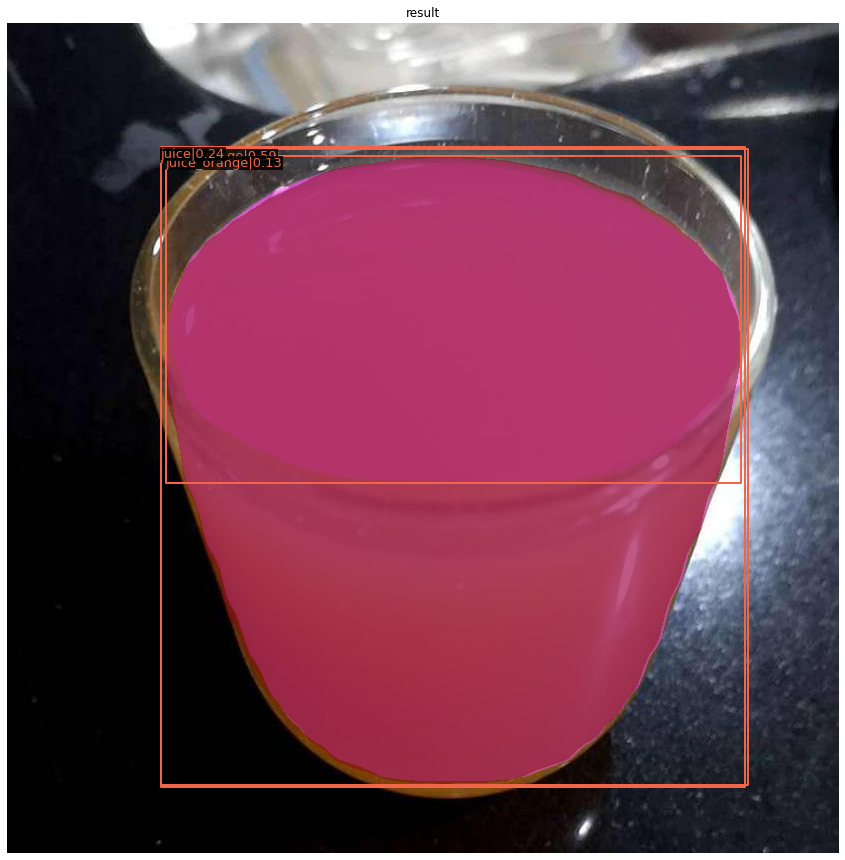

In [75]:
img = '/content/data/test/images/067170.jpg'   #you can change this to any image you want!

result = inference_detector(model, img)
show_result_pyplot(model, img, result, score_thr=0.1, title='result', wait_time=0)

In [ ]:
def remove_small_masks(masks, boxes, min_size=0):
    if min_size == 0:
        return masks, boxes

    sizes = masks.sum(-1).sum(-1)
    to_keep = sizes > min_size

    if to_keep.min() == 1:
        return masks, boxes

    smallest = sizes.min()
    to_keep = sizes > smallest

    return masks[to_keep], boxes[to_keep]

In [ ]:
result[0],result[1]=remove_small_masks(result[0], result[0], min_size=0)

In [ ]:
# print(len(result[1]))
type(result[0][0])
dict_score={}
for i,each in enumerate(result[0]):
  if each.all():
    #dict_score[i]=each[3]
    if len(each)>0:
      remove_small_masks(masks, boxes, min_size=0)

  #print(each)
  #break

## Create categories files for correct annotations during inference

In [12]:

import json, os
annotation_path = os.path.join("data", "val/annotations.json")
json_file = open(annotation_path)
coco = json.load(json_file)

with open("classes.json",'w') as f:
    json.dump(coco["categories"],f)

## Copy the config file and trained model

In [83]:
#copy the trained model and config file to home directory
%cp /content/query_large.py /content/htc_without_semantic_r50_fpn_1x_coco.py
%cp /content/drive/MyDrive/log_mmdetQuery/epoch_23.pth /content/latest.pth


# Quick Submission 💪

## Inference on the public test set
*   loading the model config and setting up related paths
*   running inference and generating json file for submission



In [84]:
##@title Inference code from myfood exp repo, Used for quick submission
%%writefile inference_mmdet.py
'''
@Author: Gaurav Singhal
@Description: Standalone file for testing and evaluating
the models. It doesn't do any post-processing or ensembling.
'''

import argparse
import os
import warnings
import glob
import json
import mmcv
import torch
from mmcv import Config, DictAction
from mmcv.cnn import fuse_conv_bn
from mmcv.parallel import MMDataParallel, MMDistributedDataParallel
from mmcv.runner import (get_dist_info, init_dist, load_checkpoint,
                         wrap_fp16_model)
from mmdet.apis import init_detector, inference_detector

from mmdet.apis import multi_gpu_test
from mmdet.datasets import (build_dataloader, build_dataset,
                            replace_ImageToTensor)
from mmdet.models import build_detector
# import aicrowd_helpers
import os.path as osp
import traceback
import pickle
import shutil
import tempfile
import time
import torch.distributed as dist
from mmcv.image import tensor2imgs
from mmdet.core import encode_mask_results

import uuid

# TEST_IMAGES_PATH = "/mnt/public/xxx/imrec/data/val/images"

def create_test_predictions(images_path):
    test_predictions_file = tempfile.NamedTemporaryFile(mode="w+", suffix=".json")
	
    annotations = {'categories': [], 'info': {}, 'images': []}
    for item in glob.glob(images_path+'/*.jpg'):
        image_dict = dict()
        img = mmcv.imread(item)
        height,width,__ = img.shape
        id = int(os.path.basename(item).split('.')[0])
        image_dict['id'] = id
        image_dict['file_name'] = os.path.basename(item)
        image_dict['width'] = width
        image_dict['height'] = height
        annotations['images'].append(image_dict)
    annotations['categories'] = json.loads(open("classes.json").read())
    json.dump(annotations, open(test_predictions_file.name, 'w'))

    return test_predictions_file

def single_gpu_test(model,
                    data_loader,
                    show=False,
                    out_dir=None,
                    show_score_thr=0.3):
    
    model.eval()
    results = []
    dataset = data_loader.dataset
    prog_bar = mmcv.ProgressBar(len(dataset))
    for i, data in enumerate(data_loader):
        # aicrowd_helpers.execution_progress({"image_ids" : [i]})
        with torch.no_grad():
            result = model(return_loss=False, rescale=True, **data)

        batch_size = len(result)
        if show or out_dir:
            if batch_size == 1 and isinstance(data['img'][0], torch.Tensor):
                img_tensor = data['img'][0]
            else:
                img_tensor = data['img'][0].data[0]
            img_metas = data['img_metas'][0].data[0]
            imgs = tensor2imgs(img_tensor, **img_metas[0]['img_norm_cfg'])
            assert len(imgs) == len(img_metas)

            for i, (img, img_meta) in enumerate(zip(imgs, img_metas)):
                h, w, _ = img_meta['img_shape']
                img_show = img[:h, :w, :]

                ori_h, ori_w = img_meta['ori_shape'][:-1]
                img_show = mmcv.imresize(img_show, (ori_w, ori_h))

                if out_dir:
                    out_file = osp.join(out_dir, img_meta['ori_filename'])
                else:
                    out_file = None

                model.module.show_result(
                    img_show,
                    result[i],
                    show=show,
                    out_file=out_file,
                    score_thr=show_score_thr)

        # Perform RLE encode for masks
        if isinstance(result[0], tuple):
            result = [(bbox_results, encode_mask_results(mask_results))
                      for bbox_results, mask_results in result]
        results.extend(result)

        for _ in range(batch_size):
            prog_bar.update()
    return results

def parse_args():
    parser = argparse.ArgumentParser(
        description='MMDet test (and eval) a model')
    parser.add_argument('--config', help='test config file path')
    parser.add_argument('--checkpoint', help='checkpoint file')
    parser.add_argument('--data', help='test data folder path')
    parser.add_argument('--out', help='output result file in pickle format')
    parser.add_argument(
        '--fuse-conv-bn',
        action='store_true',
        help='Whether to fuse conv and bn, this will slightly increase'
        'the inference speed')
    parser.add_argument(
        '--format-only',
        action='store_true',
        help='Format the output results without perform evaluation. It is'
        'useful when you want to format the result to a specific format and '
        'submit it to the test server')
    parser.add_argument(
        '--eval',
        type=str,
        nargs='+',
        help='evaluation metrics, which depends on the dataset, e.g., "bbox",'
        ' "segm", "proposal" for COCO, and "mAP", "recall" for PASCAL VOC')
    parser.add_argument('--show', action='store_true', help='show results')
    parser.add_argument(
        '--show-dir', help='directory where painted images will be saved')
    parser.add_argument(
        '--show-score-thr',
        type=float,
        default=0.3,
        help='score threshold (default: 0.3)')
    parser.add_argument(
        '--gpu-collect',
        action='store_true',
        help='whether to use gpu to collect results.')
    parser.add_argument(
        '--tmpdir',
        help='tmp directory used for collecting results from multiple '
        'workers, available when gpu-collect is not specified')
    parser.add_argument(
        '--cfg-options',
        nargs='+',
        action=DictAction,
        help='override some settings in the used config, the key-value pair '
        'in xxx=yyy format will be merged into config file.')
    parser.add_argument(
        '--options',
        nargs='+',
        action=DictAction,
        help='custom options for evaluation, the key-value pair in xxx=yyy '
        'format will be kwargs for dataset.evaluate() function (deprecate), '
        'change to --eval-options instead.')
    parser.add_argument(
        '--eval-options',
        nargs='+',
        action=DictAction,
        help='custom options for evaluation, the key-value pair in xxx=yyy '
        'format will be kwargs for dataset.evaluate() function')
    parser.add_argument(
        '--launcher',
        choices=['none', 'pytorch', 'slurm', 'mpi'],
        default='none',
        help='job launcher')
    parser.add_argument('--out_file', help='output result file')
    parser.add_argument('--local_rank', type=int, default=0)
    parser.add_argument('--type', type=str, choices=['val', 'test'], default='test')
    parser.add_argument('--reduce_ms', action='store_true',
        help='Whether to reduce the multi-scale aug')
    args = parser.parse_args()

    if 'LOCAL_RANK' not in os.environ:
        os.environ['LOCAL_RANK'] = str(args.local_rank)

    if args.options and args.eval_options:
        raise ValueError(
            '--options and --eval-options cannot be both '
            'specified, --options is deprecated in favor of --eval-options')
    if args.options:
        warnings.warn('--options is deprecated in favor of --eval-options')
        args.eval_options = args.options
    return args

def reduce_multiscale_TTA(cfg):
    '''
    Keep only 1st and last image sizes from Multi-Scale TTA
    
    @input
    cfg -> Configuration file
    '''

    scale = cfg.data.test.pipeline[1]['img_scale']
    if len(scale) > 2:
        new_scale = [scale[0], scale[-1]]
        cfg.data.test.pipeline[1]['img_scale'] = new_scale   
    return cfg

def main():
    ########################################################################
    # Register Prediction Start
    ########################################################################

    # aicrowd_helpers.execution_start()
    args = parse_args()
    data_folder = args.data
    # Create annotations if not already created
    test_predictions_file = create_test_predictions(data_folder)
    
    # Load annotations
    with open(test_predictions_file.name) as f:
        annotations = json.loads(f.read())

    assert args.out or args.eval or args.format_only or args.show \
        or args.show_dir, \
        ('Please specify at least one operation (save/eval/format/show the '
         'results / save the results) with the argument "--out", "--eval"'
         ', "--format-only", "--show" or "--show-dir"')

    if args.eval and args.format_only:
        raise ValueError('--eval and --format_only cannot be both specified')

    if args.out is not None and not args.out.endswith(('.pkl', '.pickle')):
        raise ValueError('The output file must be a pkl file.')

    cfg = Config.fromfile(args.config)
    if args.cfg_options is not None:
        cfg.merge_from_dict(args.cfg_options)
    
    JSONFILE_PREFIX="predictions_{}".format(str(uuid.uuid4())) 
    # import modules present in list of strings.
    if cfg.get('custom_imports', None):
        from mmcv.utils import import_modules_from_strings
        import_modules_from_strings(**cfg['custom_imports'])
    
    # set cudnn_benchmark
    if cfg.get('cudnn_benchmark', False):
        torch.backends.cudnn.benchmark = True
    
    cfg.data.samples_per_gpu = 2
    cfg.data.workers_per_gpu = 2
    cfg.model.pretrained = None
    cfg.data.test.test_mode = True
    cfg.data.test.ann_file = test_predictions_file.name
    cfg.data.test.img_prefix = data_folder

    if cfg.model.get('neck'):
        if isinstance(cfg.model.neck, list):
            for neck_cfg in cfg.model.neck:
                if neck_cfg.get('rfp_backbone'):
                    if neck_cfg.rfp_backbone.get('pretrained'):
                        neck_cfg.rfp_backbone.pretrained = None
        elif cfg.model.neck.get('rfp_backbone'):
            if cfg.model.neck.rfp_backbone.get('pretrained'):
                cfg.model.neck.rfp_backbone.pretrained = None

    # in case the test dataset is concatenated
    if isinstance(cfg.data.test, dict):
        cfg.data.test.test_mode = True
    elif isinstance(cfg.data.test, list):
        for ds_cfg in cfg.data.test:
            ds_cfg.test_mode = True

    cfg.data.test.ann_file = test_predictions_file.name
    cfg.data.test.img_prefix = data_folder
        
    # if args.reduce_ms:
    #     print("Reduce multi-scale TTA")
    #     cfg = reduce_multiscale_tta(cfg)
    #     print(cfg.data.test.pipeline[1]['img_scale'])
        
    if args.launcher == 'none':
        distributed = False
    else:
        distributed = True
        init_dist(args.launcher, **cfg.dist_params)
    
    # build the dataloader
    samples_per_gpu = cfg.data.test.pop('samples_per_gpu', 1)
    if samples_per_gpu > 1:
        # Replace 'ImageToTensor' to 'DefaultFormatBundle'
        cfg.data.test.pipeline = replace_ImageToTensor(cfg.data.test.pipeline)
    dataset = build_dataset(cfg.data.test)
    print(dataset)
    dataset.cat_ids = [category["id"] for category in annotations["categories"]]
    data_loader = build_dataloader(
        dataset,
        samples_per_gpu=1,
        workers_per_gpu=2,
        dist=distributed,
        shuffle=False)

    # build the model and load checkpoint
    # model = build_detector(cfg.model, train_cfg=None, test_cfg=cfg.model.test_cfg)
    model = init_detector(args.config,args.checkpoint,device='cuda:0')

    fp16_cfg = cfg.get('fp16', None)
    if fp16_cfg is not None:
        wrap_fp16_model(model)
    # checkpoint = load_checkpoint(model, args.checkpoint, map_location='cuda')
    if args.fuse_conv_bn:
        model = fuse_conv_bn(model)

    model.CLASSES = [category['name'] for category in annotations['categories']]
    # if 'CLASSES' in checkpoint['meta']:
        # model.CLASSES = checkpoint['meta']['CLASSES']
    # else:
        # model.CLASSES = dataset.CLASSES

    if not distributed:
        model = MMDataParallel(model, device_ids=[0])
        outputs = single_gpu_test(model, data_loader, args.show, args.show_dir,
                                  args.show_score_thr)
    else:
        model = MMDistributedDataParallel(
            model.cuda(),
            device_ids=[torch.cuda.current_device()],
            broadcast_buffers=False)
        outputs = multi_gpu_test(model, data_loader, args.tmpdir,
                                 args.gpu_collect)

    rank, _ = get_dist_info()
    if rank == 0:
        if args.out:
            print(f'\nwriting results to {args.out}')
            mmcv.dump(outputs, args.out)
        kwargs = {} if args.eval_options is None else args.eval_options
        if args.format_only:
            dataset.format_results(outputs, **kwargs)
        if args.eval:
            eval_kwargs = cfg.get('evaluation', {}).copy()
            for key in ['interval', 'tmpdir', 'start', 'gpu_collect']:
                eval_kwargs.pop(key, None)
            eval_kwargs.update(dict(metric=args.eval, **kwargs))
            print(dataset.evaluate(outputs, **eval_kwargs))
    
    # consolidate_results(["predictions.segm.json"], 'test_predictions.json', args.out_file)
    ########################################################################
    # Register Prediction Complete
    ########################################################################
    # aicrowd_helpers.execution_success({
    #     "predictions_output_path" : args.out_file
    # })
    print("\nAICrowd register complete")
    # preds = []
    # with open("predictions.segm.json", "r") as pred_file:
    #     preds.extend(json.loads(pred_file.read()))
    # print(preds)
    JSONFILE_PREFIX = args.eval_options['jsonfile_prefix']
    shutil.move("{}.segm.json".format(JSONFILE_PREFIX), args.out_file)
    os.remove("{}.bbox.json".format(JSONFILE_PREFIX))
        
if __name__ == '__main__':
    try:
        main()
    except Exception as e:
        error = traceback.format_exc()
        print(error)


Writing inference_mmdet.py


In [1]:
#setting the paths for images and output file
test_images_dir="/content/data/test/images"
output_filepath="/content/drive/MyDrive/trailsQuery/query_e23_cpc_preds.json"

#path of trained model & config
model_path="/content/latest.pth"
config_file="/content/htc_without_semantic_r50_fpn_1x_coco.py"

In [2]:
!python inference_mmdet.py --config $config_file --checkpoint $model_path \
--data $test_images_dir \
--format-only --eval-options "jsonfile_prefix=preds" --out_file $output_filepath

Traceback (most recent call last):
  File "inference_mmdet.py", line 19, in <module>
    from mmdet.apis import init_detector, inference_detector
  File "/content/mmdetection/mmdet/apis/__init__.py", line 1, in <module>
    from .inference import (async_inference_detector, inference_detector,
  File "/content/mmdetection/mmdet/apis/inference.py", line 6, in <module>
    from mmcv.ops import RoIPool
  File "/content/mmcv/mmcv/ops/__init__.py", line 2, in <module>
    from .active_rotated_filter import active_rotated_filter
  File "/content/mmcv/mmcv/ops/active_rotated_filter.py", line 10, in <module>
    ['active_rotated_filter_forward', 'active_rotated_filter_backward'])
  File "/content/mmcv/mmcv/utils/ext_loader.py", line 13, in load_ext
    ext = importlib.import_module('mmcv.' + name)
  File "/usr/lib/python3.7/importlib/__init__.py", line 127, in import_module
    return _bootstrap._gcd_import(name[level:], package, level)
ImportError: /content/mmcv/mmcv/_ext.cpython-37m-x86_64-li

Now that the prediction file is generated for public test set, To make quick submission:
* Use AIcrowd CLL `aicrowd submit` command to do a quick submission. </br>

**Alternatively:**
* download the `predictions_mmdetection.json` file by running below cell
* visit the [create submission page](https://www.aicrowd.com/challenges/food-recognition-benchmark-2022/submissions/new) 
* Upload the `predictions_mmdetection.json` file 
* Voila!! You just made your first submission!


In [ ]:
#use aicrowd CLI to make quick submission
!aicrowd submission create -c food-recognition-benchmark-2022 -f $output_filepath >> /dev/null

#Active submission 🤩

Step 0 : Fork the baseline to make your own changes to it. Go to settings and make the repo private.


Step 1 : For first time setup, Setting up SSH to login to Gitlab.

  0. Run the next cell to check if you already have SSH keys in your drive, if yes, skip this step. 
  1. Run `ssh-keygen -t ecdsa -b 521` 
  2. Run `cat ~./ssh/id_ecdsa.pub` and copy the output
  3. Go to [Gitlab SSH Keys](https://gitlab.aicrowd.com/profile/keys) and then paste the output inside the key and use whaever title you like. 


Step 2: Clone your forked Repo & Add Models & Push Changes

  1. Run `git clone git@gitlab.aicrowd.com:[Your Username]/mmdetection-starter-food-2022.git`
  2. Put your model inside the models directioary and then run `git-lfs track "*.pth"`
  3. Run `git add .` then `git commit -m " adding model"`
  3. Run `git push origin master`

Step 3. Create Submission

  1. Go to the repo and then tags and then New Tag. 
  2. In the tag name,you can use `submission_v1`, ( Everytime you make a new submission, just increase the no. like - `submission_v2`,  `submission_v3` )
  3. A new issue will be created with showing the process. Enjoy!




If you do not have SSH Keys, Check this [Page](https://docs.gitlab.com/ee/ssh/index.html#generate-an-ssh-key-pair)

Add your SSH Keys to your GitLab account by following the instructions here

In [ ]:
%%bash
SSH_PRIV_KEY=/content/drive/MyDrive/id_ecdsa
SSH_PUB_KEY=/content/drive/MyDrive/id_ecdsa.pub
if [ -f "$SSH_PRIV_KEY" ]; then
    echo "SSH Key found! ✅\n"
    mkdir -p /root/.ssh
    cp /content/drive/MyDrive/id_ecdsa ~/.ssh/id_ecdsa
    cp /content/drive/MyDrive/id_ecdsa.pub ~/.ssh/id_ecdsa.pub
    echo "SSH key successfully copied to local!"
else
    echo "SSH Key does not exist."
    ssh-keygen -t ecdsa -b521 -f ~/.ssh/id_ecdsa
    cat ~/.ssh/id_ecdsa.pub
    echo "❗️Please open https://gitlab.aicrowd.com/profile/keys and copy-paste the above text in the **key** textbox."
    cp  ~/.ssh/id_ecdsa /content/drive/MyDrive/id_ecdsa
    cp  ~/.ssh/id_ecdsa.pub /content/drive/MyDrive/id_ecdsa.pub
    echo "SSH key successfully created and copied to drive!"
fi

SSH Key found! ✅\n
SSH key successfully copied to local!


In [ ]:
import IPython

html = "<b>Copy paste below SSH key in your GitLab account here (one time):</b><br/>"
html += '<a href="https://gitlab.aicrowd.com/-/profile/keys" target="_blank">https://gitlab.aicrowd.com/-/profile/keys</a><br><br>'

public_key = open("/content/drive/MyDrive/id_ecdsa.pub").read()
html += '<br/><textarea>'+public_key+'</textarea><button onclick="navigator.clipboard.writeText(\''+public_key.strip()+'\');this.innerHTML=\'Copied ✅\'">Click to copy</button>'
IPython.display.HTML(html)

Clone the gitlab starter repo and add submission files

In [ ]:
# Set your AIcrowd username for action submission.
# This username will store repository and used for submitter's username, etc
username = "saidinesh_pola"
!echo -n {username} > author.txt

In [ ]:
%%bash
username=$(cat author.txt)
echo "Username $username"

git config --global user.name "$username"
git config --global user.email "$username@noreply.gitlab.aicrowd.com"

touch ${HOME}/.ssh/known_hosts
ssh-keyscan -H gitlab.aicrowd.com >> ${HOME}/.ssh/known_hosts 2> /dev/null


apt install -qq -y jq git-lfs &> /dev/null

git lfs install
cd /content/

echo "Checking if repository already exist, otherwise create one"
export SUBMISSION_REPO="git@gitlab.aicrowd.com:$username/mmdetection-starter-food-2022.git"
echo "cloning the $SUBMISSION_REPO"
git clone $SUBMISSION_REPO mmdetection-starter-food-2022
ALREADYEXIST=$?

if [ $ALREADYEXIST -ne 0 ]; then
  echo "Project didn't exist, forking from upstream"
  git clone https://github.com/AIcrowd/food-recognition-benchmark-starter-kit.git mmdetection-starter-food-2022
fi

cd /content/mmdetection-starter-food-2022
git remote remove origin
git remote add origin "$SUBMISSION_REPO"

Username saidinesh_pola
Git LFS initialized.
Checking if repository already exist, otherwise create one
cloning the git@gitlab.aicrowd.com:saidinesh_pola/mmdetection-starter-food-2022.git


Error: Failed to call git rev-parse --git-dir --show-toplevel: "fatal: not a git repository (or any of the parent directories): .git\n"
Cloning into 'mmdetection-starter-food-2022'...
tcmalloc: large alloc 1471086592 bytes == 0x5570707bc000 @  0x7efc5e2fa2a4 0x557033e9fe8f 0x557033e7cfcb 0x557033e31f33 0x557033dd622a 0x557033dd66e6 0x557033df3451 0x557033df39e9 0x557033df3f13 0x557033e98b82 0x557033d3a162 0x557033d20a65 0x557033d21725 0x557033d2072a 0x7efc5d640c87 0x557033d2077a
tcmalloc: large alloc 2206621696 bytes == 0x5570c82ac000 @  0x7efc5e2fa2a4 0x557033e9fe8f 0x557033e7cfcb 0x557033e31f33 0x557033dd622a 0x557033dd66e6 0x557033df3451 0x557033df39e9 0x557033df3f13 0x557033e98b82 0x557033d3a162 0x557033d20a65 0x557033d21725 0x557033d2072a 0x7efc5d640c87 0x557033d2077a
tcmalloc: large alloc 3309936640 bytes == 0x55714bb12000 @  0x7efc5e2fa2a4 0x557033e9fe8f 0x557033e7cfcb 0x557033e31f33 0x557033dd622a 0x557033dd66e6 0x557033df3451 0x557033df39e9 0x557033df3f13 0x557033e98b82 0x5570

## To make active submission:
* Required Files are `aicrowd.json, apt.txt, requirements.txt, predict.py` (already configured for mmdetection)
* **[IMP]** Copy mmdetection trained model, corresponding config file to repo
* for inference place these files : `predict_mmdetection.py mmdet_inference.py` (already present in repo)
* Modify requirements.txt and `predict.py` for mmdetection
* **[IMP]** Modify `aicrowd.json` for your submission

**Note:** You only need to place your trained model and modify aicrowd.json to create your first easy submission. 

In [ ]:
#@title Modify mmdet_inference.py (modify and run only if you want to change the inference)
%%writefile /content/mmdetection-starter-food-2022/utils/mmdet_inference.py

import mmcv
import numpy as np
import torch
from mmcv.ops import RoIPool
from mmcv.parallel import collate, scatter
from mmcv.runner import load_checkpoint

from mmdet.core import get_classes
from mmdet.datasets import replace_ImageToTensor
from mmdet.datasets.pipelines import Compose
from mmdet.models import build_detector
# import time


def inference(model, imgs):

    # start = time.process_time()
    imgs = [imgs]
    cfg = model.cfg
    device = 'cuda:0'
    if isinstance(imgs[0], np.ndarray):
        cfg = cfg.copy()
        # set loading pipeline type
        cfg.data.test.pipeline[0].type = 'LoadImageFromWebcam'

    cfg.data.test.pipeline = replace_ImageToTensor(cfg.data.test.pipeline)
    test_pipeline = Compose(cfg.data.test.pipeline)

    datas = []
    data = dict(img_info=dict(filename=imgs[0]), img_prefix=None)
    # build the data pipeline
    data = test_pipeline(data)
    datas.append(data)

    data = collate(datas, samples_per_gpu=len(imgs))
    # just get the actual data from DataContainer
    data['img_metas'] = [img_metas.data[0] for img_metas in data['img_metas']]
    data['img'] = [img.data[0] for img in data['img']]
    # scatter to specified GPU
    data = scatter(data, [device])[0]
    
    # forward the model
    with torch.no_grad():
        results = model(return_loss=False, rescale=True, **data)
    # your code here    
    # print(time.process_time() - start)
    return results[0]



In [ ]:
#@title Modify predict_mmdetection.py (modify & run this only if you want to change inference code part)
%%writefile /content/mmdetection-starter-food-2022/predict_mmdetection.py

import os
import json
import glob
from PIL import Image
import importlib
import numpy as np
import cv2
import torch
import traceback
import pickle
import shutil
import glob
import tempfile
import time
import mmcv
import torch.distributed as dist
from mmcv.image import tensor2imgs
from mmdet.core import encode_mask_results
from mmcv import Config, DictAction
from mmcv.cnn import fuse_conv_bn
from mmcv.parallel import MMDataParallel, MMDistributedDataParallel
from mmcv.runner import (get_dist_info, init_dist, load_checkpoint,
                         wrap_fp16_model)
from mmdet.apis import init_detector, inference_detector

from mmdet.apis import multi_gpu_test
from mmdet.datasets import (build_dataloader, build_dataset,
                            replace_ImageToTensor)
from mmdet.models import build_detector
import pycocotools.mask as mask_util

from utils.mmdet_inference import inference
from evaluator.food_challenge import FoodChallengePredictor


"""
Expected ENVIRONMENT Variables
* AICROWD_TEST_IMAGES_PATH : abs path to  folder containing all the test images
* AICROWD_PREDICTIONS_OUTPUT_PATH : path where you are supposed to write the output predictions.json
"""

class MMDetectionPredictor(FoodChallengePredictor):

    """
    PARTICIPANT_TODO:
    You can do any preprocessing required for your codebase here like loading up models into memory, etc.
    """
    def prediction_setup(self):
        # self.PADDING = 50
        # self.SEGMENTATION_LENGTH = 10
        # self.MAX_NUMBER_OF_ANNOTATIONS = 10

        #set the config parameters, including the architecture which was previously used
        self.cfg_name, self.checkpoint_name = self.get_mmdetection_config()
        self.cfg = Config.fromfile(self.cfg_name)
        # self.test_img_path = os.getenv("AICROWD_TEST_IMAGES_PATH", os.getcwd() + "/data/images/")
        self.test_predictions_file = self.create_test_predictions(self.test_data_path)

        if self.cfg.get('cudnn_benchmark', False):
            torch.backends.cudnn.benchmark = True
        self.cfg.data.samples_per_gpu = 1
        self.cfg.data.workers_per_gpu = 2
        self.cfg.model.pretrained = None
        self.cfg.data.test.test_mode = True
        self.cfg.data.test.ann_file = self.test_predictions_file.name
        self.cfg.data.test.img_prefix = self.test_data_path

        self.model = init_detector(self.cfg_name,self.checkpoint_name,device='cuda:0')

        fp16_cfg = self.cfg.get('fp16', None)
        if fp16_cfg is not None:
            wrap_fp16_model(self.model)

         # Load annotations
        with open(self.test_predictions_file.name) as f:
            self.annotations = json.loads(f.read())
        self.cat_ids = [category["id"] for category in self.annotations["categories"]]

        self.model.CLASSES = [category['name'] for category in self.annotations['categories']]

    """
    PARTICIPANT_TODO:
    During the evaluation all image file path will be provided one by one.
    NOTE: In case you want to load your model, please do so in `predict_setup` function.
    """
    def prediction(self, image_path):
        print("Generating for", image_path)
        # read the image
        result = inference(self.model, image_path)
        #RLE Encode the masks
        result = (result[0], encode_mask_results(result[1]))
        result = self.segm2jsonformat(result,image_path)
        return result

    def xyxy2xywh(self,bbox):
        _bbox = bbox.tolist()
        return [
            _bbox[0],
            _bbox[1],
            _bbox[2] - _bbox[0] + 1,
            _bbox[3] - _bbox[1] + 1,
        ]

    def segm2jsonformat(self, result,image_path):
        segm_json_results = []
        img_id = int(os.path.basename(image_path).split(".")[0])
        det, seg = result
        # print("image:",img_id)
        for label in range(len(det)):
                bboxes = det[label]
                #print(type(bboxes))
                segms = seg[label]
                mask_score = [bbox[4] for bbox in bboxes]
                for i in range(len(bboxes)):
                        data = dict()
                        data['image_id'] = img_id
                        data['bbox'] = self.xyxy2xywh(bboxes[i])
                        data['score'] = float(mask_score[i])
                        data['category_id'] = self.cat_ids[label]
                        if isinstance(segms[i]['counts'], bytes):
                                segms[i]['counts'] = segms[i]['counts'].decode()
                        data['segmentation'] = segms[i]
                        segm_json_results.append(data)
        return segm_json_results


    def create_test_predictions(self,images_path):
        test_predictions_file = tempfile.NamedTemporaryFile(mode="w+", suffix=".json")
        annotations = {'categories': [], 'info': {}, 'images': []}
        for item in glob.glob(images_path+'/*.jpg'):
            image_dict = dict()
            img = mmcv.imread(item)
            height,width,__ = img.shape
            id = int(os.path.basename(item).split('.')[0])
            image_dict['image_id'] = id
            image_dict['file_name'] = os.path.basename(item)
            image_dict['width'] = width
            image_dict['height'] = height
            annotations['images'].append(image_dict)
        annotations['categories'] = json.loads(open("classes.json").read())
        json.dump(annotations, open(test_predictions_file.name, 'w'))

        return test_predictions_file

    def get_mmdetection_config(self):
        with open('aicrowd.json') as f:
            content = json.load(f)
            config_fname = content['model_config_file']
            checkpoint_fname = content['model_path']
        # config = Config.fromfile(config_fname)
        return (config_fname, checkpoint_fname)


if __name__ == "__main__":
    submission = MMDetectionPredictor()
    submission.run()
    print("Successfully generated predictions!")


In [ ]:
MODEL_ARCH = "htc_without_semantic_r50_fpn_1x_coco.py"
aicrowd_json = {
  "challenge_id" : "food-recognition-benchmark-2022",
  "authors" : ["pola_saidinesh"],
  "description" : "Food Recognition Benchmark 2022 Submission mmdetection",
  "license" : "MIT",
  "gpu": True,
  "debug": False,
  "model_path": "models/latest.pth",
  "model_type": "mmdetection",
  "model_config_file": "models/" + MODEL_ARCH
}
import json
with open('/content/mmdetection-starter-food-2022/aicrowd.json', 'w') as fp:
  fp.write(json.dumps(aicrowd_json, indent=4))

### Copy required files (trained model, config, classes.json) to mmdetection repo

In [ ]:
!mkdir -p /content/mmdetection-starter-food-2022/models
#!cp /content/classes.json /content/mmdetection-starter-food-2022/utils/classes.json
!cp /content/drive/MyDrive/log_mmdetQuery/epoch_23.pth /content/mmdetection-starter-food-2022/models/latest.pth
#!cp $MODEL_ARCH /content/mmdetection-starter-food-2022/models/$MODEL_ARCH

### Finally push the repo for active submission

In [ ]:
%%bash

## Set your unique tag for this submission (no spaces), example:
# export MSG="v1"
# export MSG="v2" ...
# or something more informative...
export MSG="mmdetection_submission_v2_ep23_old"

username=$(cat author.txt)
echo "Username $username"


cd /content/mmdetection-starter-food-2022
git lfs track "*.pth"
git add .gitattributes
git add --all
git commit -m "$MSG" || true

find . -type f -size +5M -exec git lfs migrate import --include={} &> /dev/null \;

git tag -am "submission_$MSG" "submission_$MSG"
git config lfs.https://gitlab.aicrowd.com/$username/mmdetection-starter-food-2022.git/info/lfs.locksverify false

git remote remove origin
git remote add origin git@gitlab.aicrowd.com:$username/mmdetection-starter-food-2022.git

git lfs push origin master
git push origin master
git push origin "submission_$MSG"

echo "Track your submission status here: https://gitlab.aicrowd.com/$username/mmdetection-starter-food-2022/issues"

Username saidinesh_pola
"*.pth" already supported
[ep14 62b6eaa] mmdetection_submission_v2_ep23_old
 1 file changed, 1 insertion(+), 1 deletion(-)
Error scanning for Git LFS files in the "master" ref
Git LFS: (1 of 1 files, 10 skipped) 3.85 GB / 3.85 GB, 19.59 GB skipped        
Track your submission status here: https://gitlab.aicrowd.com/saidinesh_pola/mmdetection-starter-food-2022/issues


Encountered %!d(MISSING) file(s) that may not have been copied correctly on Windows:
	models/latest.pth

See: `git lfs help smudge` for more details.
Error in git rev-list --objects master --not --remotes=origin --: exit status 128 fatal: bad revision 'master'

error: src refspec master does not match any.
error: failed to push some refs to 'git@gitlab.aicrowd.com:saidinesh_pola/mmdetection-starter-food-2022.git'
remote: 
remote:           #///(            )///#        
remote:          ////      ///      ////        
remote:         /////   //////////   ////        
remote:         /////////////////////////        
remote:      /// /////////////////////// ///        
remote:    ///////////////////////////////////        
remote:   /////////////////////////////////////        
remote:     )////////////////////////////////(        
remote:      /////                      /////        
remote:    (///////   ///       ///    //////)        
remote:   ///////////    ///////     ////////// 

## Local Evaluation for Active Submission Repo

In [ ]:
%%bash
cd /content/mmdetection-starter-food-2022

export TEST_DATASET_PATH=../data/test/images
export RESULTS_DATASET_PATH=../data
./run.sh

# Sahi Stuff

In [ ]:
!sahi coco evaluate --result_json_path  /content/drive/MyDrive/Preds/query_ep22_val_preds.json --dataset_json_path data/val/annotations.json --type segm --out_dir output/directory

In [ ]:
!python /content/drive/MyDrive/sahi_error_analysis.py --result_json_path  /content/drive/MyDrive/Preds/query_ep22_val_preds.json --dataset_json_path data/val/annotations.json --type segm  --iou_thrs 0.1 --out_dir output/directory --export_visual

## coco_test prediction

In [ ]:
# arrange an instance segmentation model for test
from sahi.utils.mmdet import (
    download_mmdet_cascade_mask_rcnn_model,
    download_mmdet_config,
)

# import required functions, classes
from sahi.model import MmdetDetectionModel
from sahi.utils.cv import read_image
from sahi.utils.file import download_from_url
from sahi.predict import get_prediction, get_sliced_prediction, predict
from IPython.display import Image

In [ ]:
!pip install git+https://github.com/saidineshpola/QueryInst.git@main

In [ ]:
detection_model = MmdetDetectionModel(
    model_path='/content/drive/MyDrive/log_mmdetQuery/epoch_22.pth',
    config_path='/content/drive/MyDrive/log_mmdetQuery/query_large.py',
    confidence_threshold=0.1,
    device='cuda:0'
)
import tempfile
import json, os
annotation_path = os.path.join("data", "val/annotations.json")
json_file = open(annotation_path)
coco = json.load(json_file)

with open("classes.json",'w') as f:
    json.dump(coco["categories"],f)



In [ ]:
import json
import glob
import mmcv
def create_test_predictions(images_path):
    #test_predictions_file = tempfile.NamedTemporaryFile(mode="w+", suffix=".json")
    annotations = {'categories': [], 'info': {}, 'images': []}
    for item in glob.glob(images_path+'/*.jpg'):
        image_dict = dict()
        img = mmcv.imread(item)
        height,width,__ = img.shape
        #print(item)
        if len(os.path.basename(item).split('.')[0]) > 10:
          print('big value')
          continue
        id = int(str(os.path.basename(item).split('.')[0]))
        image_dict['id'] = id
        image_dict['file_name'] = os.path.basename(item)
        image_dict['width'] = width
        image_dict['height'] = height
        annotations['images'].append(image_dict)
    annotations['categories'] = json.loads(open("classes.json").read())
    print(len(annotations['images']))
    json.dump(annotations, open('test_predictions_file.json', 'w'))
food_item='65' #brocoli    
create_test_predictions(f'/content/viper/Images/{food_item}')
#food_item='broccoli'

big value
big value
big value
big value
172


In [ ]:

import glob
import json
import cv2
from pycocotools import mask
result_list=[]
from tqdm import tqdm
img_ids=[]
count=0
for image in tqdm(glob.glob(f'/content/viper/Images/{food_item}/*.jpg')):
  h,w=cv2.imread(image).shape[:2]
  result = get_prediction(image, detection_model)
  if len(os.path.basename(image).split('.')[0]) > 10:
          print('big value')
          continue
  id = int(os.path.basename(image).split('.')[0])
  result=result.to_coco_predictions(image_id=id) #[0]
  # print(result)

  # break
  for _ in result:
    # This is for food101-cheesecake
    if _['category_name']=='shrimp_prawn': #food_item:
      result_list.append(_)
      count=count+1
      print(f'found {count}')
    # if _['segmentation']: #isinstance(_, 'segmentation'):
    #   mask_poly=_['segmentation']
    #   _.pop('segmentation', None)
    # _['segmentation']=mask.merge(mask.frPyObjects(mask_poly, h, w))
    # result_list.append(_)


In [ ]:
################## converting 0:323 ids into category Ids
#print(len(result_list))
with open('/content/classes.json') as f:
  classes=json.load(f)
#newlist = sorted(classes, key=lambda d: d['id'])  
class_to={}
for i,x in enumerate(classes):
  class_to[str(i)]=str(x['id'])
  # print(x['id'],i)
  # break

In [ ]:
food_item='shrimp_prawn'

In [ ]:
# with open('/content/classes.json') as f:
#   classes=json.load(f)
for i,each in enumerate(classes):
  if each['name']==food_item:
    print(each)
    print(i)
    print(result_list[0]['category_id'] )

{'id': 101279, 'name': 'shrimp_prawn', 'name_readable': 'shrimp_prawn', 'supercategory': 'food'}
26
26


In [ ]:
## saving pred file 
print(result_list[0]['category_id']  )
for each in result_list:
  each['category_id']=int(class_to[str(each['category_id'])])
  #print(each)
  # break
print(result_list[0]['category_id'] ) 

with open('/content/test_predictions_file.json','r') as f:
  result_coco=json.load(f)
result_coco['annotations']=result_list
with open(f'/content/drive/MyDrive/Preds/{food_item}.json','w') as f:
  json.dump(result_coco,f)
print(f"{food_item}.json file saved")

26
101279
shrimp_prawn.json file saved


In [ ]:

with open('/content/drive/MyDrive/Preds/query_ep22_test_preds_coco_th0.1.json','r') as f:
  result_coco=json.load(f)
#result_coco = json.load('/content/test_predictions_file.json')
#result_coco['annotations']=result_list

In [ ]:
for key in result_coco:
  print(len(result_coco[key]))
  print(key)

323
categories
0
info
2819
images
25095
annotations


In [ ]:
for each in result_coco['annotations']:
  each['category_id']=class_to[str(each['category_id'])]


In [ ]:
result_coco['annotations'][4]['category_id']

101254

In [ ]:
with open('/content/drive/MyDrive/Preds/query_ep22_test_preds_coco_th0.1_new.json','w') as f:
  json.dump(result_coco,f)

In [ ]:
#classes from food dataset
classes=['cheesecake','fish_and_chips','guacamole','hamburger',
         'sushi']

### Food101

In [ ]:
!wget -O food101.tar.gz 'http://data.vision.ee.ethz.ch/cvl/food-101.tar.gz'
!tar -xvf *.gz

In [ ]:
!wget -O viper.zip 'https://lorenz.ecn.purdue.edu/~vfn/vfn_1_0.zip'
!unzip *.zip

In [73]:
import glob
import shutil
import os

def mover(src_dir,dst_dir='data/train/images'):
  for jpgfile in glob.iglob(os.path.join(src_dir, "*.jpg")):
      shutil.copy(jpgfile, dst_dir)
# classes_folders=['/content/food-101/images/cheesecake','/content/food-101/images/fish_and_chips','/content/food-101/images/guacamole','/content/food-101/images/hamburger',
#          '/content/food-101/images/sushi']  
# viper 3 4 8 16 26 38 65
classes_folders=['/content/vfn_1_0/Images/3''/content/vfn_1_0/Images/4','/content/vfn_1_0/Images/16','/content/vfn_1_0/Images/26',
                 '/content/vfn_1_0/Images/38','/content/vfn_1_0/Images/65','/content/vfn_1_0/Images/8']
for each in classes_folders:
  mover(each,'data/train/images')

In [ ]:
predict(
    model_type = "mmdet",
    model_path='/content/drive/MyDrive/log_mmdetQuery/epoch_22.pth',
    model_config_path='/content/drive/MyDrive/log_mmdetQuery/query_large.py',
    model_device='cuda:0',
    model_confidence_threshold=0.01,
    source='/content/data/test/images',
    slice_height=512,
    slice_width=512,
    overlap_height_ratio=0.2,
    overlap_width_ratio=0.2,
)

In [52]:
import json
#classes_folders=['/content/vfn_1_0/Images/'] 3 4 8 16 26 38 65
data_1= json.load(open('/content/drive/MyDrive/Preds/applesauce.json','r'))
data_2= json.load(open('/content/drive/MyDrive/Preds/guacamole.json','r'))
data_3= json.load(open('/content/drive/MyDrive/Preds/baked_potato.json','r'))

data_4= json.load(open('/content/drive/MyDrive/Preds/shrimp_prawn.json','r'))

data_5= json.load(open('/content/drive/MyDrive/Preds/croissant.json','r'))
data_6= json.load(open('/content/drive/MyDrive/Preds/chicken_breast.json','r'))
data_7= json.load(open('/content/drive/MyDrive/Preds/avocado.json','r'))
data_8= json.load(open('/content/drive/MyDrive/Preds/fish_and_chips.json','r'))
data_9= json.load(open('/content/drive/MyDrive/Preds/broccoli.json','r'))
data_10= json.load(open('/content/drive/MyDrive/Preds/sushi.json','r'))
data_11= json.load(open('/content/drive/MyDrive/Preds/hamburger.json','r'))
data_12= json.load(open('/content/drive/MyDrive/Preds/cheesecake.json','r'))

# for each in data_aps['annotations']:
#   each['category_id']=int(each['category_id'])

In [115]:
united_data=data_1
united_data['images']=united_data['images']+data_2['images']+data_3['images']+data_4['images']+data_5['images']+data_6['images']+data_7['images']+data_8['images']+data_9['images']+data_10['images']+data_11['images']+data_12['images']
united_data['annotations']=united_data['annotations']+data_2['annotations']+data_3['annotations']+data_4['annotations']+data_5['annotations']+data_6['annotations']+data_7['annotations']+data_8['annotations']+data_9['annotations']+data_10['annotations']+data_12['annotations']+data_11['annotations']

In [65]:
print(len(united_data['images']))
print(len(united_data['annotations']))
for each in united_data['annotations']:
  each['category_id']=int(each['category_id'])


6493
2217


In [119]:
with open('/content/drive/MyDrive/Preds/united_data.json','w') as f:
  json.dump(united_data,f)

In [116]:
united_data=json.load(open('/content/drive/MyDrive/Preds/united_data.json','r'))
data=json.load(open('/content/data/val/annotations.json','r'))

In [117]:
count=0
data_dict={}
del_list=[]
for i,each in enumerate(united_data['annotations']):
  var=each['image_id']
  #print('firstone')
  my_path=f'data/train/images/{str(var)}.jpg'
  if os.path.exists(my_path) and not (each['image_id'] in data_dict):
    data_dict[each['image_id']]=1
    count=count+1
  else:
    del_list.append(i)

  # if each['id']==746012 or each['image_id']==746012:
  #   data['annotations'].remove(each)
print(count)  


1028


In [118]:
for index in sorted(del_list, reverse=True):
    del united_data['annotations'][index]  

In [94]:
import os

_, _, files = next(os.walk("/content/data/train/images"))
len(files)

6132

In [8]:
from sahi.utils.coco import Coco

# init Coco object
coco = Coco.from_coco_dict_or_path("data/val/annotations_new.json")

# get dataset stats
coco.stats

indexing coco dataset annotations...


Loading coco annotations: 100%|██████████| 946/946 [00:00<00:00, 2871.96it/s]


{'avg_annotation_area': 91020.04215456675,
 'avg_num_annotations_in_image': 1.8054968287526427,
 'max_annotation_area': 1059493,
 'max_annotation_area_per_category': {'alfa_sprouts': 0,
  'almonds': 66639,
  'aperitif_with_alcohol_n_s_aperol_spritz': 0,
  'apple': 303639,
  'apple_pie': 85972,
  'applesauce': 228383,
  'apricots': 241215,
  'artichoke': 0,
  'asparagus': 42219,
  'aubergine_eggplant': 89575,
  'avocado': 210938,
  'bacon': 75523,
  'baked_potato': 180648,
  'balsamic_salad_dressing': 41018,
  'banana': 147311,
  'banana_cake': 79867,
  'basil': 9042,
  'beans_kidney': 98821,
  'beef_n_s': 300430,
  'beer': 310910,
  'beetroot-steamed-without-addition-of-salt': 129187,
  'beetroot_raw': 59781,
  'bell_pepper_red_raw': 345701,
  'bell_pepper_red_stewed': 9429,
  'berries_n_s': 16717,
  'birchermuesli_prepared_no_sugar_added': 263142,
  'biscuit': 193256,
  'black_olives': 118836,
  'blue_mould_cheese': 44131,
  'blueberries': 201390,
  'bolognaise_sauce': 151581,
  'boui